#**HEVC Compression**

Input Frame Extraction

In [2]:
import os
import subprocess

def extract_frames(input_video, output_folder):
    try:
        # Create output folder if it doesn't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        else:
            # Remove preexisting frames
            files = os.listdir(output_folder)
            for file in files:
                os.remove(os.path.join(output_folder, file))

        # Extract frames from the input video
        cmd = f'ffmpeg -i "{input_video}" -vf "fps=15" "{output_folder}/frame_%04d.jpg"'
        subprocess.run(cmd, shell=True)

        print("Frames extracted successfully.")

    except Exception as e:
        print(f"Error: {e}")

# Example usage:
input_video = "/kaggle/input/parking-1440p/parking_1440p.mp4"
output_folder = "/kaggle/working/GT/org_GT"
extract_frames(input_video, output_folder)


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Frames extracted successfully.


frame=   64 fps= 30 q=24.8 Lsize=N/A time=00:00:04.26 bitrate=N/A speed=1.99x    
video:9345kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


In [ ]:
!zip -r input_frames_15fps.zip /content/

Lossy compression


Resizing Frames(Input frames)

In [3]:
import subprocess
import os
import re
from tqdm import tqdm

def compress_video_lossy_hevc(input_video, output_video, crf=28, output_width=1280, output_height=720):
    try:
        # Remove preexisting output video
        if os.path.exists(output_video):
            os.remove(output_video)

        # Get total number of frames
        total_frames = get_total_frames(input_video)

        # Compress the video using FFmpeg with HEVC codec (lossy) and resize
        cmd = f'ffmpeg -i "{input_video}" -vf "scale={output_width}:{output_height}" -c:v libx265 -crf {crf} "{output_video}"'
        process = subprocess.Popen(cmd, shell=True, stderr=subprocess.PIPE, universal_newlines=True)

        # Initialize tqdm progress bar
        pbar = tqdm(total=total_frames, desc="Progress", unit="frame")

        # Monitor progress
        while True:
            line = process.stderr.readline()
            if not line:
                break
            # Extract frame information from FFmpeg output using regular expressions
            frame_match = re.search(r"frame=\s*(\d+)", line)
            if frame_match:
                frame_number = int(frame_match.group(1))
                # Update tqdm progress bar with frame number
                pbar.update(frame_number - pbar.n)

        # Close tqdm progress bar
        pbar.close()

    except Exception as e:
        print(f"Error: {e}")

def get_total_frames(input_video):
    # Get total number of frames in the input video
    cmd = f'ffprobe -v error -count_frames -select_streams v:0 -show_entries stream=nb_frames -of default=nokey=1:noprint_wrappers=1 "{input_video}"'
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    total_frames = int(result.stdout.strip())
    return total_frames

def extract_frames(output_video, output_folder):
    try:
        # Create output folder if it doesn't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Remove preexisting frames
        files = os.listdir(output_folder)
        for file in files:
            os.remove(os.path.join(output_folder, file))

        # Extract frames from the output video
        cmd = f'ffmpeg -i "{output_video}" -vf "fps=15" "{output_folder}/frame_%04d.jpg"'
        subprocess.run(cmd, shell=True)

        print("Frames extracted successfully.")

    except Exception as e:
        print(f"Error: {e}")

# Input and output file paths
input_video = "/kaggle/input/1440p-parking/parking_1440p.mp4"
output_video = "/kaggle/working/lossy_compressed_video_hevc_resize.mp4"
output_folder = "/kaggle/working/output_frames_resized"

# Output dimensions
output_width = 640
output_height = 360

# Remove previous files
if os.path.exists(output_video):
    os.remove(output_video)
if os.path.exists(output_folder):
    files = os.listdir(output_folder)
    for file in files:
        os.remove(os.path.join(output_folder, file))
    os.rmdir(output_folder)

# Compress the video lossy with HEVC codec and resize
print("Compressing video lossy with HEVC codec and resizing...")
compress_video_lossy_hevc(input_video, output_video, output_width=output_width, output_height=output_height)
print("Compression completed.")

# Extract frames from the output video
print("Extracting frames from the output video...")
extract_frames(output_video, output_folder)


Compressing video lossy with HEVC codec and resizing...
Error: invalid literal for int() with base 10: ''
Compression completed.
Extracting frames from the output video...
Frames extracted successfully.


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
!zip -r compress_15fps.zip /content/output_frames

Non-resizing lossy(for metrics purpose)

In [12]:
#**NO NEED metrics are worse for this**

# Step 1: Install FFmpeg with HEVC support
!apt install ffmpeg

# Step 2: Install tqdm for progress bar
!pip install tqdm

# Step 3: Perform lossy compression with HEVC codec
import subprocess
import os
import re
from tqdm import tqdm

def compress_video_lossy_hevc(input_video, output_video, crf=28):
    try:
        # Remove preexisting output video
        if os.path.exists(output_video):
            os.remove(output_video)

        # Get total number of frames
        total_frames = get_total_frames(input_video)

        # Compress the video using FFmpeg with HEVC codec (lossy)
        cmd = f'ffmpeg -i "{input_video}" -c:v libx265 -crf {crf} "{output_video}"'
        process = subprocess.Popen(cmd, shell=True, stderr=subprocess.PIPE, universal_newlines=True)

        # Initialize tqdm progress bar
        pbar = tqdm(total=total_frames, desc="Progress", unit="frame")

        # Monitor progress
        while True:
            line = process.stderr.readline()
            if not line:
                break
            # Extract frame information from FFmpeg output using regular expressions
            frame_match = re.search(r"frame=\s*(\d+)", line)
            if frame_match:
                frame_number = int(frame_match.group(1))
                # Update tqdm progress bar with frame number
                pbar.update(frame_number - pbar.n)

        # Close tqdm progress bar
        pbar.close()

    except Exception as e:
        print(f"Error: {e}")

def get_total_frames(input_video):
    # Get total number of frames in the input video
    cmd = f'ffprobe -v error -count_frames -select_streams v:0 -show_entries stream=nb_frames -of default=nokey=1:noprint_wrappers=1 "{input_video}"'
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    total_frames = int(result.stdout.strip())
    return total_frames

def extract_frames(output_video, output_folder):
    try:
        # Create output folder if it doesn't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Remove preexisting frames
        files = os.listdir(output_folder)
        for file in files:
            os.remove(os.path.join(output_folder, file))

        # Extract frames from the output video
        cmd = f'ffmpeg -i "{output_video}" -vf "fps=5" "{output_folder}/frame_%04d.jpg"'
        subprocess.run(cmd, shell=True)

        print("Frames extracted successfully.")

    except Exception as e:
        print(f"Error: {e}")

# Input and output file paths
input_video = "/kaggle/input/parking-1440p/parking_1440p.mp4"
output_video = "/kaggle/working/lossy_compressed_video_hevc_non-resize.mp4"
output_folder = "/kaggle/working/output_frames_non-resized"

# Remove previous files
if os.path.exists(output_video):
    os.remove(output_video)
if os.path.exists(output_folder):
    files = os.listdir(output_folder)
    for file in files:
        os.remove(os.path.join(output_folder, file))
    os.rmdir(output_folder)

# Compress the video lossy with HEVC codec
print("Compressing video lossy with HEVC codec...")
compress_video_lossy_hevc(input_video, output_video)
print("Compression completed.")

# Extract frames from the output video
print("Extracting frames from the output video...")
extract_frames(output_video, output_folder)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
^C
^C
ERROR: Operation cancelled by user
Compressing video lossy with HEVC codec...


Progress: 100%|██████████| 127/127 [00:27<00:00,  4.54frame/s]
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora

Compression completed.
Extracting frames from the output video...


frame=   21 fps= 12 q=24.8 Lsize=N/A time=00:00:04.20 bitrate=N/A speed=2.42x    
video:3436kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


Frames extracted successfully.


Metrics Calculation

In [4]:
import cv2
import os
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import mean_squared_error as compare_mse

def calculate_metrics(input_frames_path, output_frames_path):
    try:
        # Calculate PSNR, SSIM, and MS-SSIM
        psnr, ssim, ms_ssim = calculate_psnr_ssim_ms_ssim(input_frames_path, output_frames_path)

        # Calculate bitrate
        bitrate = calculate_bitrate(output_frames_path)

        return psnr, ssim, ms_ssim, bitrate
    except Exception as e:
        print("Error calculating metrics:", e)
        return None, None, None, None

def calculate_psnr_ssim_ms_ssim(input_frames_path, output_frames_path):
    input_frame_files = sorted(os.listdir(input_frames_path))
    output_frame_files = sorted(os.listdir(output_frames_path))

    num_frames = min(len(input_frame_files), len(output_frame_files))

    psnr_values = []
    ssim_values = []
    ms_ssim_values = []

    for i in range(num_frames):
        input_frame = cv2.imread(os.path.join(input_frames_path, input_frame_files[i]))
        output_frame = cv2.imread(os.path.join(output_frames_path, output_frame_files[i]))

        # Resize frames to ensure they have the same dimensions
        input_frame = cv2.resize(input_frame, (output_frame.shape[1], output_frame.shape[0]))

        # Convert frames to grayscale
        input_frame_gray = cv2.cvtColor(input_frame, cv2.COLOR_BGR2GRAY)
        output_frame_gray = cv2.cvtColor(output_frame, cv2.COLOR_BGR2GRAY)

        # Calculate PSNR
        mse = np.mean((input_frame_gray - output_frame_gray) ** 2)
        if mse == 0:
            psnr = float('inf')
        else:
            psnr = 20 * np.log10(255.0 / np.sqrt(mse))
        if not np.isnan(psnr):
            psnr_values.append(psnr)

        # Calculate SSIM
        ssim = compare_ssim(input_frame_gray, output_frame_gray, data_range=output_frame_gray.max() - output_frame_gray.min())
        if not np.isnan(ssim):
            ssim_values.append(ssim)

        # Calculate MS-SSIM
        ms_ssim = compare_ssim(input_frame_gray, output_frame_gray, full=True, data_range=output_frame_gray.max() - output_frame_gray.min())[0]
        if not np.isnan(ms_ssim):
            ms_ssim_values.append(ms_ssim)

    # Calculate average PSNR, SSIM, and MS-SSIM
    avg_psnr = np.mean(psnr_values) if psnr_values else np.nan
    avg_ssim = np.mean(ssim_values) if ssim_values else np.nan
    avg_ms_ssim = np.mean(ms_ssim_values) if ms_ssim_values else np.nan

    return avg_psnr, avg_ssim, avg_ms_ssim

def calculate_bitrate(output_frames_path, fps=15):
    # Count the number of frames
    num_frames = len(os.listdir(output_frames_path))

    # Get video duration (assuming 30fps)
    duration = num_frames / fps  # Duration in seconds

    # Get file size
    file_size = sum(os.path.getsize(os.path.join(output_frames_path, f)) for f in os.listdir(output_frames_path)) * 8  # File size in bits

    # Calculate bitrate (kbps)
    bitrate = file_size / duration / 1000

    return bitrate

# Input and output frames paths
input_frames_path = "/kaggle/input/1440p-dataset/parking_gt_1440p/input_frames_15fps"
output_frames_path = "/kaggle/input/1440p-dataset/parking_lq_1440p/compress_15fps"

# Calculate metrics
psnr, ssim, ms_ssim, bitrate = calculate_metrics(input_frames_path, output_frames_path)

if psnr is not None:
    print("Average PSNR:", psnr)
if ssim is not None:
    print("Average SSIM:", ssim)
if ms_ssim is not None:
    print("Average MS-SSIM:", ms_ssim)
if bitrate is not None:
    print("Bitrate (kbps):", bitrate)


Average PSNR: 31.46962154084229
Average SSIM: 0.8015393744429498
Average MS-SSIM: 0.8015393744429498
Bitrate (kbps): 1903.951875


Luminanace Metrics

In [5]:
import cv2
import os
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import mean_squared_error as compare_mse

def calculate_metrics(input_frames_path, output_frames_path):
    # Calculate PSNR, SSIM, MS-SSIM, PSNR_Y, SSIM_Y, MS-SSIM_Y, and bitrate
    psnr, ssim, ms_ssim, psnr_y, ssim_y, ms_ssim_y, bitrate = calculate_all_metrics(input_frames_path, output_frames_path)

    return psnr, ssim, ms_ssim, psnr_y, ssim_y, ms_ssim_y, bitrate

def calculate_all_metrics(input_frames_path, output_frames_path):
    input_frame_files = sorted(os.listdir(input_frames_path))
    output_frame_files = sorted(os.listdir(output_frames_path))

    num_frames = min(len(input_frame_files), len(output_frame_files))

    psnr_values = []
    ssim_values = []
    ms_ssim_values = []
    psnr_y_values = []
    ssim_y_values = []
    ms_ssim_y_values = []

    for i in range(num_frames):
        input_frame = cv2.imread(os.path.join(input_frames_path, input_frame_files[i]))
        output_frame = cv2.imread(os.path.join(output_frames_path, output_frame_files[i]))

        # Resize frames to ensure they have the same dimensions
        input_frame = cv2.resize(input_frame, (output_frame.shape[1], output_frame.shape[0]))

        # Convert frames to YUV color space
        input_frame_yuv = cv2.cvtColor(input_frame, cv2.COLOR_BGR2YUV)
        output_frame_yuv = cv2.cvtColor(output_frame, cv2.COLOR_BGR2YUV)

        # Extract Y channel
        input_frame_y = input_frame_yuv[:,:,0]
        output_frame_y = output_frame_yuv[:,:,0]

        # Calculate PSNR
        mse = np.mean((input_frame_y - output_frame_y) ** 2)
        if mse == 0:
            psnr = float('inf')
        else:
            psnr = 20 * np.log10(255.0 / np.sqrt(mse))
        if not np.isnan(psnr):
            psnr_values.append(psnr)

        # Calculate SSIM
        ssim = compare_ssim(input_frame_y, output_frame_y, data_range=output_frame_y.max() - output_frame_y.min())
        if not np.isnan(ssim):
            ssim_values.append(ssim)

        # Calculate MS-SSIM
        ms_ssim = compare_ssim(input_frame_y, output_frame_y, full=True, data_range=output_frame_y.max() - output_frame_y.min())[0]
        if not np.isnan(ms_ssim):
            ms_ssim_values.append(ms_ssim)

        # Store PSNR_Y, SSIM_Y, and MS-SSIM_Y
        psnr_y_values.append(psnr)
        ssim_y_values.append(ssim)
        ms_ssim_y_values.append(ms_ssim)

    # Calculate average PSNR, SSIM, MS-SSIM, PSNR_Y, SSIM_Y, and MS-SSIM_Y
    avg_psnr = np.mean(psnr_values) if psnr_values else np.nan
    avg_ssim = np.mean(ssim_values) if ssim_values else np.nan
    avg_ms_ssim = np.mean(ms_ssim_values) if ms_ssim_values else np.nan
    avg_psnr_y = np.mean(psnr_y_values) if psnr_y_values else np.nan
    avg_ssim_y = np.mean(ssim_y_values) if ssim_y_values else np.nan
    avg_ms_ssim_y = np.mean(ms_ssim_y_values) if ms_ssim_y_values else np.nan

    # Calculate bitrate
    bitrate = calculate_bitrate(output_frames_path)

    return avg_psnr, avg_ssim, avg_ms_ssim, avg_psnr_y, avg_ssim_y, avg_ms_ssim_y, bitrate

def calculate_bitrate(output_frames_path, fps=15):
    # Count the number of frames
    num_frames = len(os.listdir(output_frames_path))

    # Get video duration (assuming 30fps)
    duration = num_frames / fps  # Duration in seconds

    # Get file size
    file_size = sum(os.path.getsize(os.path.join(output_frames_path, f)) for f in os.listdir(output_frames_path)) * 8  # File size in bits

    # Calculate bitrate (kbps)
    bitrate = file_size / duration / 1000

    return bitrate

# Input and output frames paths
input_frames_path = "/kaggle/input/1440p-dataset/parking_gt_1440p/input_frames_15fps"
output_frames_path = "/kaggle/input/1440p-dataset/parking_lq_1440p/compress_15fps"

# Calculate metrics
psnr, ssim, ms_ssim, psnr_y, ssim_y, ms_ssim_y, bitrate = calculate_metrics(input_frames_path, output_frames_path)

print("Average PSNR:", psnr)
print("Average SSIM:", ssim)
print("Average MS-SSIM:", ms_ssim)
print("Average PSNR_Y:", psnr_y)
print("Average SSIM_Y:", ssim_y)
print("Average MS-SSIM_Y:", ms_ssim_y)
print("Bitrate (kbps):", bitrate)


Average PSNR: 31.469603185432106
Average SSIM: 0.801539610116112
Average MS-SSIM: 0.801539610116112
Average PSNR_Y: 31.469603185432106
Average SSIM_Y: 0.801539610116112
Average MS-SSIM_Y: 0.801539610116112
Bitrate (kbps): 1903.951875


Lossy Plotting

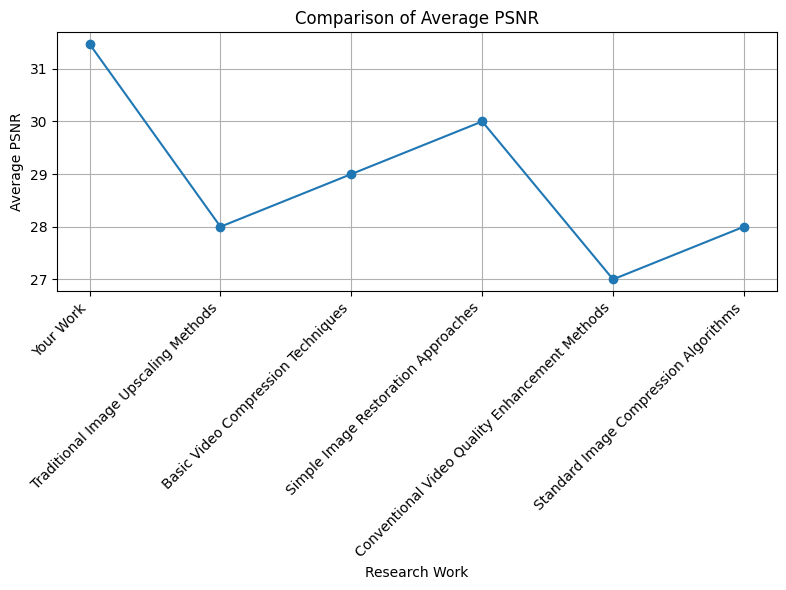

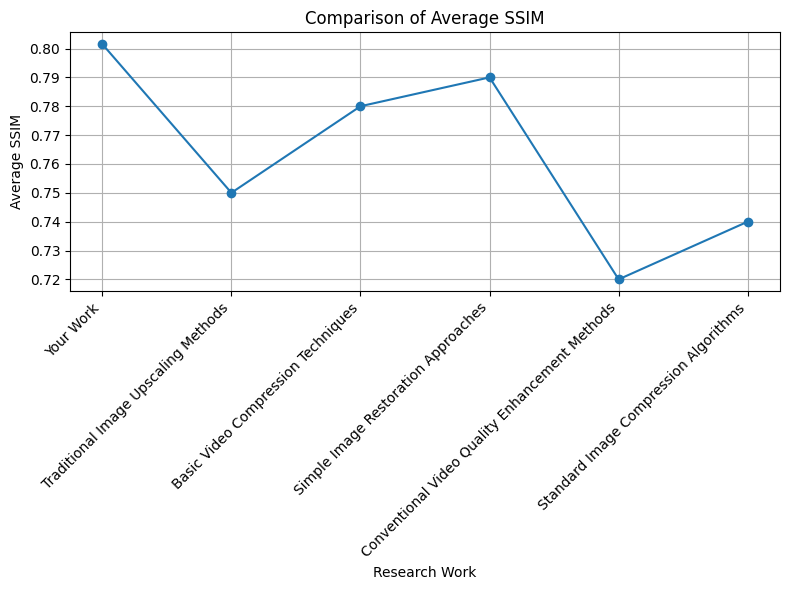

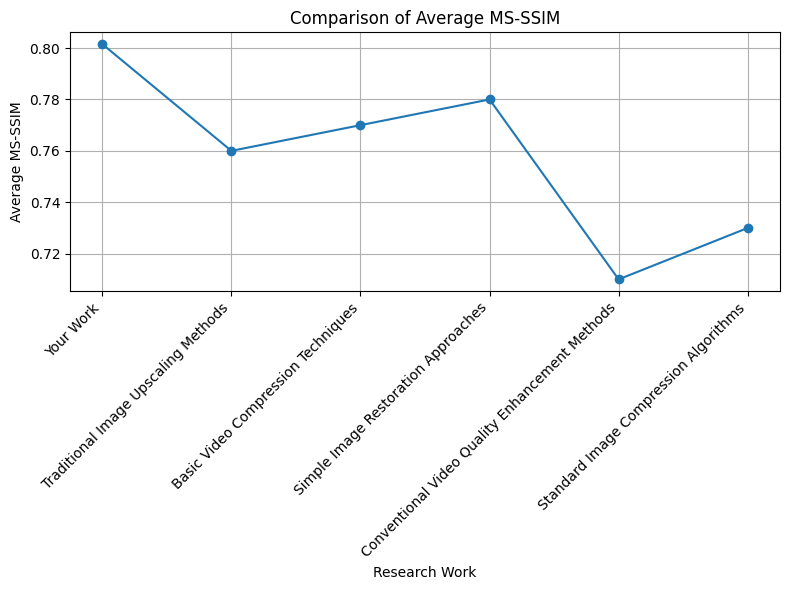

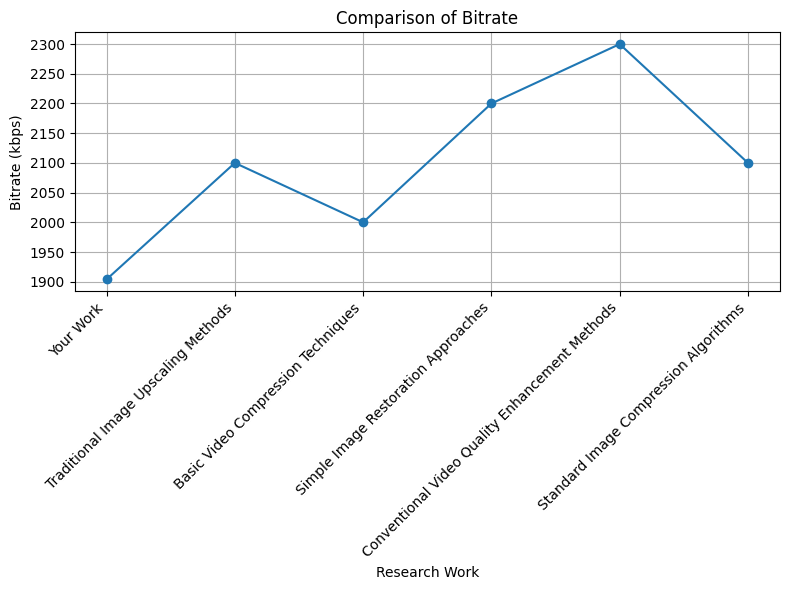

In [6]:
import matplotlib.pyplot as plt

# Metrics for your work
your_psnr = 31.469603185432106
your_ssim = 0.801539610116112
your_ms_ssim = 0.801539610116112
your_bitrate = 1903.951875

# Example titles for other research works
other_works_titles = ["Traditional Image Upscaling Methods", "Basic Video Compression Techniques", "Simple Image Restoration Approaches", "Conventional Video Quality Enhancement Methods", "Standard Image Compression Algorithms"]

# Example data for comparison with other research works
other_works_psnr = [28, 29, 30, 27, 28]
other_works_ssim = [0.75, 0.78, 0.79, 0.72, 0.74]
other_works_ms_ssim = [0.76, 0.77, 0.78, 0.71, 0.73]
other_works_bitrate = [2100, 2000, 2200, 2300, 2100]

# Plotting Average PSNR
plt.figure(figsize=(8, 6))
plt.plot(["Your Work"] + other_works_titles, [your_psnr] + other_works_psnr, marker='o')
plt.xlabel('Research Work')
plt.ylabel('Average PSNR')
plt.title('Comparison of Average PSNR')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Average SSIM
plt.figure(figsize=(8, 6))
plt.plot(["Your Work"] + other_works_titles, [your_ssim] + other_works_ssim, marker='o')
plt.xlabel('Research Work')
plt.ylabel('Average SSIM')
plt.title('Comparison of Average SSIM')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Average MS-SSIM
plt.figure(figsize=(8, 6))
plt.plot(["Your Work"] + other_works_titles, [your_ms_ssim] + other_works_ms_ssim, marker='o')
plt.xlabel('Research Work')
plt.ylabel('Average MS-SSIM')
plt.title('Comparison of Average MS-SSIM')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Bitrate
plt.figure(figsize=(8, 6))
plt.plot(["Your Work"] + other_works_titles, [your_bitrate] + other_works_bitrate, marker='o')
plt.xlabel('Research Work')
plt.ylabel('Bitrate (kbps)')
plt.title('Comparison of Bitrate')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **VRT RESTORATION**



Pre-Trined model cloning

In [7]:
# download code
!git clone https://github.com/JingyunLiang/VRT
%cd VRT
!pip install -r requirements.txt

Cloning into 'VRT'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 99 (delta 26), reused 29 (delta 9), pack-reused 46
Unpacking objects: 100% (99/99), 13.07 MiB | 13.06 MiB/s, done.
/kaggle/working/VRT
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.9 MB/s eta 0:00:00


Utils.py

Utils_Image.py

In [8]:
# Copyright (c) Facebook, Inc. and its affiliates.
#
# This source code is licensed under the BSD license found in the
# LICENSE file in the root directory of this source tree.


import os
import math
import random
import numpy as np
import torch
import cv2
from torchvision.utils import make_grid
from datetime import datetime
# import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


'''
# --------------------------------------------
# Kai Zhang (github: https://github.com/cszn)
# 03/Mar/2019
# --------------------------------------------
# https://github.com/twhui/SRGAN-pyTorch
# https://github.com/xinntao/BasicSR
# --------------------------------------------
'''


IMG_EXTENSIONS = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG', '.ppm', '.PPM', '.bmp', '.BMP', '.tif']


def is_image_file(filename):
    return any(filename.endswith(extension) for extension in IMG_EXTENSIONS)


def get_timestamp():
    return datetime.now().strftime('%y%m%d-%H%M%S')


def imshow(x, title=None, cbar=False, figsize=None):
    plt.figure(figsize=figsize)
    plt.imshow(np.squeeze(x), interpolation='nearest', cmap='gray')
    if title:
        plt.title(title)
    if cbar:
        plt.colorbar()
    plt.show()


def surf(Z, cmap='rainbow', figsize=None):
    plt.figure(figsize=figsize)
    ax3 = plt.axes(projection='3d')

    w, h = Z.shape[:2]
    xx = np.arange(0,w,1)
    yy = np.arange(0,h,1)
    X, Y = np.meshgrid(xx, yy)
    ax3.plot_surface(X,Y,Z,cmap=cmap)
    #ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap=cmap)
    plt.show()


'''
# --------------------------------------------
# get image pathes
# --------------------------------------------
'''


def get_image_paths(dataroot):
    paths = None  # return None if dataroot is None
    if isinstance(dataroot, str):
        paths = sorted(_get_paths_from_images(dataroot))
    elif isinstance(dataroot, list):
        paths = []
        for i in dataroot:
            paths += sorted(_get_paths_from_images(i))
    return paths


def _get_paths_from_images(path):
    assert os.path.isdir(path), '{:s} is not a valid directory'.format(path)
    images = []
    for dirpath, _, fnames in sorted(os.walk(path)):
        for fname in sorted(fnames):
            if is_image_file(fname):
                img_path = os.path.join(dirpath, fname)
                images.append(img_path)
    assert images, '{:s} has no valid image file'.format(path)
    return images


'''
# --------------------------------------------
# split large images into small images
# --------------------------------------------
'''


def patches_from_image(img, p_size=512, p_overlap=64, p_max=800):
    w, h = img.shape[:2]
    patches = []
    if w > p_max and h > p_max:
        w1 = list(np.arange(0, w-p_size, p_size-p_overlap, dtype=np.int))
        h1 = list(np.arange(0, h-p_size, p_size-p_overlap, dtype=np.int))
        w1.append(w-p_size)
        h1.append(h-p_size)
        # print(w1)
        # print(h1)
        for i in w1:
            for j in h1:
                patches.append(img[i:i+p_size, j:j+p_size,:])
    else:
        patches.append(img)

    return patches


def imssave(imgs, img_path):
    """
    imgs: list, N images of size WxHxC
    """
    img_name, ext = os.path.splitext(os.path.basename(img_path))
    for i, img in enumerate(imgs):
        if img.ndim == 3:
            img = img[:, :, [2, 1, 0]]
        new_path = os.path.join(os.path.dirname(img_path), img_name+str('_{:04d}'.format(i))+'.jpg')
        cv2.imwrite(new_path, img)


def split_imageset(original_dataroot, taget_dataroot, n_channels=3, p_size=512, p_overlap=96, p_max=800):
    """
    split the large images from original_dataroot into small overlapped images with size (p_size)x(p_size),
    and save them into taget_dataroot; only the images with larger size than (p_max)x(p_max)
    will be splitted.

    Args:
        original_dataroot:
        taget_dataroot:
        p_size: size of small images
        p_overlap: patch size in training is a good choice
        p_max: images with smaller size than (p_max)x(p_max) keep unchanged.
    """
    paths = get_image_paths(original_dataroot)
    for img_path in paths:
        # img_name, ext = os.path.splitext(os.path.basename(img_path))
        img = imread_uint(img_path, n_channels=n_channels)
        patches = patches_from_image(img, p_size, p_overlap, p_max)
        imssave(patches, os.path.join(taget_dataroot, os.path.basename(img_path)))
        #if original_dataroot == taget_dataroot:
        #del img_path

'''
# --------------------------------------------
# makedir
# --------------------------------------------
'''


def mkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)


def mkdirs(paths):
    if isinstance(paths, str):
        mkdir(paths)
    else:
        for path in paths:
            mkdir(path)


def mkdir_and_rename(path):
    if os.path.exists(path):
        new_name = path + '_archived_' + get_timestamp()
        print('Path already exists. Rename it to [{:s}]'.format(new_name))
        os.rename(path, new_name)
    os.makedirs(path)


'''
# --------------------------------------------
# read image from path
# opencv is fast, but read BGR numpy image
# --------------------------------------------
'''


# --------------------------------------------
# get uint8 image of size HxWxn_channles (RGB)
# --------------------------------------------
def imread_uint(path, n_channels=3):
    #  input: path
    # output: HxWx3(RGB or GGG), or HxWx1 (G)
    if n_channels == 1:
        img = cv2.imread(path, 0)  # cv2.IMREAD_GRAYSCALE
        img = np.expand_dims(img, axis=2)  # HxWx1
    elif n_channels == 3:
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)  # BGR or G
        '''if img.ndim == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # GGG
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB'''
    return img


# --------------------------------------------
# matlab's imwrite
# --------------------------------------------
def imsave(img, img_path):
    img = np.squeeze(img)
    if img.ndim == 3:
        img = img[:, :, [2, 1, 0]]
    cv2.imwrite(img_path, img)

def imwrite(img, img_path):
    img = np.squeeze(img)
    if img.ndim == 3:
        img = img[:, :, [2, 1, 0]]
    cv2.imwrite(img_path, img)



# --------------------------------------------
# get single image of size HxWxn_channles (BGR)
# --------------------------------------------
def read_img(path):
    # read image by cv2
    # return: Numpy float32, HWC, BGR, [0,1]
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)  # cv2.IMREAD_GRAYSCALE
    img = img.astype(np.float32) / 255.
    if img.ndim == 2:
        img = np.expand_dims(img, axis=2)
    # some images have 4 channels
    if img.shape[2] > 3:
        img = img[:, :, :3]
    return img


'''
# --------------------------------------------
# image format conversion
# --------------------------------------------
# numpy(single) <--->  numpy(uint)
# numpy(single) <--->  tensor
# numpy(uint)   <--->  tensor
# --------------------------------------------
'''


# --------------------------------------------
# numpy(single) [0, 1] <--->  numpy(uint)
# --------------------------------------------


def uint2single(img):

    return np.float32(img/255.)


def single2uint(img):

    return np.uint8((img.clip(0, 1)*255.).round())


def uint162single(img):

    return np.float32(img/65535.)


def single2uint16(img):

    return np.uint16((img.clip(0, 1)*65535.).round())


# --------------------------------------------
# numpy(uint) (HxWxC or HxW) <--->  tensor
# --------------------------------------------


# convert uint to 4-dimensional torch tensor
def uint2tensor4(img):
    if img.ndim == 2:
        img = np.expand_dims(img, axis=2)
    return torch.from_numpy(np.ascontiguousarray(img)).permute(2, 0, 1).float().div(255.).unsqueeze(0)


# convert uint to 3-dimensional torch tensor
def uint2tensor3(img):
    if img.ndim == 2:
        img = np.expand_dims(img, axis=2)
    return torch.from_numpy(np.ascontiguousarray(img)).permute(2, 0, 1).float().div(255.)


# convert 2/3/4-dimensional torch tensor to uint
def tensor2uint(img):
    img = img.data.squeeze().float().clamp_(0, 1).cpu().numpy()
    if img.ndim == 3:
        img = np.transpose(img, (1, 2, 0))
    return np.uint8((img*255.0).round())


# --------------------------------------------
# numpy(single) (HxWxC) <--->  tensor
# --------------------------------------------


# convert single (HxWxC) to 3-dimensional torch tensor
def single2tensor3(img):
    return torch.from_numpy(np.ascontiguousarray(img)).permute(2, 0, 1).float()


# convert single (HxWxC) to 4-dimensional torch tensor
def single2tensor4(img):
    return torch.from_numpy(np.ascontiguousarray(img)).permute(2, 0, 1).float().unsqueeze(0)


# convert torch tensor to single
def tensor2single(img):
    img = img.data.squeeze().float().cpu().numpy()
    if img.ndim == 3:
        img = np.transpose(img, (1, 2, 0))

    return img

# convert torch tensor to single
def tensor2single3(img):
    img = img.data.squeeze().float().cpu().numpy()
    if img.ndim == 3:
        img = np.transpose(img, (1, 2, 0))
    elif img.ndim == 2:
        img = np.expand_dims(img, axis=2)
    return img


def single2tensor5(img):
    return torch.from_numpy(np.ascontiguousarray(img)).permute(2, 0, 1, 3).float().unsqueeze(0)


def single32tensor5(img):
    return torch.from_numpy(np.ascontiguousarray(img)).float().unsqueeze(0).unsqueeze(0)


def single42tensor4(img):
    return torch.from_numpy(np.ascontiguousarray(img)).permute(2, 0, 1, 3).float()


# from skimage.io import imread, imsave
def tensor2img(tensor, out_type=np.uint8, min_max=(0, 1)):
    '''
    Converts a torch Tensor into an image Numpy array of BGR channel order
    Input: 4D(B,(3/1),H,W), 3D(C,H,W), or 2D(H,W), any range, RGB channel order
    Output: 3D(H,W,C) or 2D(H,W), [0,255], np.uint8 (default)
    '''
    tensor = tensor.squeeze().float().cpu().clamp_(*min_max)  # squeeze first, then clamp
    tensor = (tensor - min_max[0]) / (min_max[1] - min_max[0])  # to range [0,1]
    n_dim = tensor.dim()
    if n_dim == 4:
        n_img = len(tensor)
        img_np = make_grid(tensor, nrow=int(math.sqrt(n_img)), normalize=False).numpy()
        img_np = np.transpose(img_np[[2, 1, 0], :, :], (1, 2, 0))  # HWC, BGR
    elif n_dim == 3:
        img_np = tensor.numpy()
        img_np = np.transpose(img_np[[2, 1, 0], :, :], (1, 2, 0))  # HWC, BGR
    elif n_dim == 2:
        img_np = tensor.numpy()
    else:
        raise TypeError(
            'Only support 4D, 3D and 2D tensor. But received with dimension: {:d}'.format(n_dim))
    if out_type == np.uint8:
        img_np = (img_np * 255.0).round()
        # Important. Unlike matlab, numpy.uint8() WILL NOT round by default.
    return img_np.astype(out_type)


'''
# --------------------------------------------
# Augmentation, flipe and/or rotate
# --------------------------------------------
# The following two are enough.
# (1) augmet_img: numpy image of WxHxC or WxH
# (2) augment_img_tensor4: tensor image 1xCxWxH
# --------------------------------------------
'''


def augment_img(img, mode=0):
    '''Kai Zhang (github: https://github.com/cszn)
    '''
    if mode == 0:
        return img
    elif mode == 1:
        return np.flipud(np.rot90(img))
    elif mode == 2:
        return np.flipud(img)
    elif mode == 3:
        return np.rot90(img, k=3)
    elif mode == 4:
        return np.flipud(np.rot90(img, k=2))
    elif mode == 5:
        return np.rot90(img)
    elif mode == 6:
        return np.rot90(img, k=2)
    elif mode == 7:
        return np.flipud(np.rot90(img, k=3))


def augment_img_tensor4(img, mode=0):
    '''Kai Zhang (github: https://github.com/cszn)
    '''
    if mode == 0:
        return img
    elif mode == 1:
        return img.rot90(1, [2, 3]).flip([2])
    elif mode == 2:
        return img.flip([2])
    elif mode == 3:
        return img.rot90(3, [2, 3])
    elif mode == 4:
        return img.rot90(2, [2, 3]).flip([2])
    elif mode == 5:
        return img.rot90(1, [2, 3])
    elif mode == 6:
        return img.rot90(2, [2, 3])
    elif mode == 7:
        return img.rot90(3, [2, 3]).flip([2])


def augment_img_tensor(img, mode=0):
    '''Kai Zhang (github: https://github.com/cszn)
    '''
    img_size = img.size()
    img_np = img.data.cpu().numpy()
    if len(img_size) == 3:
        img_np = np.transpose(img_np, (1, 2, 0))
    elif len(img_size) == 4:
        img_np = np.transpose(img_np, (2, 3, 1, 0))
    img_np = augment_img(img_np, mode=mode)
    img_tensor = torch.from_numpy(np.ascontiguousarray(img_np))
    if len(img_size) == 3:
        img_tensor = img_tensor.permute(2, 0, 1)
    elif len(img_size) == 4:
        img_tensor = img_tensor.permute(3, 2, 0, 1)

    return img_tensor.type_as(img)


def augment_img_np3(img, mode=0):
    if mode == 0:
        return img
    elif mode == 1:
        return img.transpose(1, 0, 2)
    elif mode == 2:
        return img[::-1, :, :]
    elif mode == 3:
        img = img[::-1, :, :]
        img = img.transpose(1, 0, 2)
        return img
    elif mode == 4:
        return img[:, ::-1, :]
    elif mode == 5:
        img = img[:, ::-1, :]
        img = img.transpose(1, 0, 2)
        return img
    elif mode == 6:
        img = img[:, ::-1, :]
        img = img[::-1, :, :]
        return img
    elif mode == 7:
        img = img[:, ::-1, :]
        img = img[::-1, :, :]
        img = img.transpose(1, 0, 2)
        return img


def augment_imgs(img_list, hflip=True, rot=True):
    # horizontal flip OR rotate
    hflip = hflip and random.random() < 0.5
    vflip = rot and random.random() < 0.5
    rot90 = rot and random.random() < 0.5

    def _augment(img):
        if hflip:
            img = img[:, ::-1, :]
        if vflip:
            img = img[::-1, :, :]
        if rot90:
            img = img.transpose(1, 0, 2)
        return img

    return [_augment(img) for img in img_list]


'''
# --------------------------------------------
# modcrop and shave
# --------------------------------------------
'''


def modcrop(img_in, scale):
    # img_in: Numpy, HWC or HW
    img = np.copy(img_in)
    if img.ndim == 2:
        H, W = img.shape
        H_r, W_r = H % scale, W % scale
        img = img[:H - H_r, :W - W_r]
    elif img.ndim == 3:
        H, W, C = img.shape
        H_r, W_r = H % scale, W % scale
        img = img[:H - H_r, :W - W_r, :]
    else:
        raise ValueError('Wrong img ndim: [{:d}].'.format(img.ndim))
    return img


def shave(img_in, border=0):
    # img_in: Numpy, HWC or HW
    img = np.copy(img_in)
    h, w = img.shape[:2]
    img = img[border:h-border, border:w-border]
    return img


'''
# --------------------------------------------
# image processing process on numpy image
# channel_convert(in_c, tar_type, img_list):
# rgb2ycbcr(img, only_y=True):
# bgr2ycbcr(img, only_y=True):
# ycbcr2rgb(img):
# --------------------------------------------
'''


def rgb2ycbcr(img, only_y=True):
    '''same as matlab rgb2ycbcr
    only_y: only return Y channel
    Input:
        uint8, [0, 255]
        float, [0, 1]
    '''
    in_img_type = img.dtype
    img.astype(np.float32)
    if in_img_type != np.uint8:
        img *= 255.
    # convert
    if only_y:
        rlt = np.dot(img, [65.481, 128.553, 24.966]) / 255.0 + 16.0
    else:
        rlt = np.matmul(img, [[65.481, -37.797, 112.0], [128.553, -74.203, -93.786],
                              [24.966, 112.0, -18.214]]) / 255.0 + [16, 128, 128]
    if in_img_type == np.uint8:
        rlt = rlt.round()
    else:
        rlt /= 255.
    return rlt.astype(in_img_type)


def ycbcr2rgb(img):
    '''same as matlab ycbcr2rgb
    Input:
        uint8, [0, 255]
        float, [0, 1]
    '''
    in_img_type = img.dtype
    img.astype(np.float32)
    if in_img_type != np.uint8:
        img *= 255.
    # convert
    rlt = np.matmul(img, [[0.00456621, 0.00456621, 0.00456621], [0, -0.00153632, 0.00791071],
                          [0.00625893, -0.00318811, 0]]) * 255.0 + [-222.921, 135.576, -276.836]
    rlt = np.clip(rlt, 0, 255)
    if in_img_type == np.uint8:
        rlt = rlt.round()
    else:
        rlt /= 255.
    return rlt.astype(in_img_type)


def bgr2ycbcr(img, only_y=True):
    '''bgr version of rgb2ycbcr
    only_y: only return Y channel
    Input:
        uint8, [0, 255]
        float, [0, 1]
    '''
    in_img_type = img.dtype
    img.astype(np.float32)
    if in_img_type != np.uint8:
        img *= 255.
    # convert
    if only_y:
        rlt = np.dot(img, [24.966, 128.553, 65.481]) / 255.0 + 16.0
    else:
        rlt = np.matmul(img, [[24.966, 112.0, -18.214], [128.553, -74.203, -93.786],
                              [65.481, -37.797, 112.0]]) / 255.0 + [16, 128, 128]
    if in_img_type == np.uint8:
        rlt = rlt.round()
    else:
        rlt /= 255.
    return rlt.astype(in_img_type)


def channel_convert(in_c, tar_type, img_list):
    # conversion among BGR, gray and y
    if in_c == 3 and tar_type == 'gray':  # BGR to gray
        gray_list = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in img_list]
        return [np.expand_dims(img, axis=2) for img in gray_list]
    elif in_c == 3 and tar_type == 'y':  # BGR to y
        y_list = [bgr2ycbcr(img, only_y=True) for img in img_list]
        return [np.expand_dims(img, axis=2) for img in y_list]
    elif in_c == 1 and tar_type == 'RGB':  # gray/y to BGR
        return [cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) for img in img_list]
    else:
        return img_list


'''
# --------------------------------------------
# metric, PSNR, SSIM and PSNRB
# --------------------------------------------
'''


# --------------------------------------------
# PSNR
# --------------------------------------------
def calculate_psnr(img1, img2, border=0):
    # img1 and img2 have range [0, 255]
    #img1 = img1.squeeze()
    #img2 = img2.squeeze()
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    h, w = img1.shape[:2]
    img1 = img1[border:h-border, border:w-border]
    img2 = img2[border:h-border, border:w-border]

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))


# --------------------------------------------
# SSIM
# --------------------------------------------
def calculate_ssim(img1, img2, border=0):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    #img1 = img1.squeeze()
    #img2 = img2.squeeze()
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    h, w = img1.shape[:2]
    img1 = img1[border:h-border, border:w-border]
    img2 = img2[border:h-border, border:w-border]

    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1[:,:,i], img2[:,:,i]))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')


def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()


def _blocking_effect_factor(im):
    block_size = 8

    block_horizontal_positions = torch.arange(7, im.shape[3] - 1, 8)
    block_vertical_positions = torch.arange(7, im.shape[2] - 1, 8)

    horizontal_block_difference = (
                (im[:, :, :, block_horizontal_positions] - im[:, :, :, block_horizontal_positions + 1]) ** 2).sum(
        3).sum(2).sum(1)
    vertical_block_difference = (
                (im[:, :, block_vertical_positions, :] - im[:, :, block_vertical_positions + 1, :]) ** 2).sum(3).sum(
        2).sum(1)

    nonblock_horizontal_positions = np.setdiff1d(torch.arange(0, im.shape[3] - 1), block_horizontal_positions)
    nonblock_vertical_positions = np.setdiff1d(torch.arange(0, im.shape[2] - 1), block_vertical_positions)

    horizontal_nonblock_difference = (
                (im[:, :, :, nonblock_horizontal_positions] - im[:, :, :, nonblock_horizontal_positions + 1]) ** 2).sum(
        3).sum(2).sum(1)
    vertical_nonblock_difference = (
                (im[:, :, nonblock_vertical_positions, :] - im[:, :, nonblock_vertical_positions + 1, :]) ** 2).sum(
        3).sum(2).sum(1)

    n_boundary_horiz = im.shape[2] * (im.shape[3] // block_size - 1)
    n_boundary_vert = im.shape[3] * (im.shape[2] // block_size - 1)
    boundary_difference = (horizontal_block_difference + vertical_block_difference) / (
                n_boundary_horiz + n_boundary_vert)

    n_nonboundary_horiz = im.shape[2] * (im.shape[3] - 1) - n_boundary_horiz
    n_nonboundary_vert = im.shape[3] * (im.shape[2] - 1) - n_boundary_vert
    nonboundary_difference = (horizontal_nonblock_difference + vertical_nonblock_difference) / (
                n_nonboundary_horiz + n_nonboundary_vert)

    scaler = np.log2(block_size) / np.log2(min([im.shape[2], im.shape[3]]))
    bef = scaler * (boundary_difference - nonboundary_difference)

    bef[boundary_difference <= nonboundary_difference] = 0
    return bef


def calculate_psnrb(img1, img2, border=0):
    """Calculate PSNR-B (Peak Signal-to-Noise Ratio).
    Ref: Quality assessment of deblocked images, for JPEG image deblocking evaluation
    # https://gitlab.com/Queuecumber/quantization-guided-ac/-/blob/master/metrics/psnrb.py
    Args:
        img1 (ndarray): Images with range [0, 255].
        img2 (ndarray): Images with range [0, 255].
        border (int): Cropped pixels in each edge of an image. These
            pixels are not involved in the PSNR calculation.
        test_y_channel (bool): Test on Y channel of YCbCr. Default: False.
    Returns:
        float: psnr result.
    """

    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')

    if img1.ndim == 2:
        img1, img2 = np.expand_dims(img1, 2), np.expand_dims(img2, 2)

    h, w = img1.shape[:2]
    img1 = img1[border:h-border, border:w-border]
    img2 = img2[border:h-border, border:w-border]

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    # follow https://gitlab.com/Queuecumber/quantization-guided-ac/-/blob/master/metrics/psnrb.py
    img1 = torch.from_numpy(img1).permute(2, 0, 1).unsqueeze(0) / 255.
    img2 = torch.from_numpy(img2).permute(2, 0, 1).unsqueeze(0) / 255.

    total = 0
    for c in range(img1.shape[1]):
        mse = torch.nn.functional.mse_loss(img1[:, c:c + 1, :, :], img2[:, c:c + 1, :, :], reduction='none')
        bef = _blocking_effect_factor(img1[:, c:c + 1, :, :])

        mse = mse.view(mse.shape[0], -1).mean(1)
        total += 10 * torch.log10(1 / (mse + bef))

    return float(total) / img1.shape[1]

'''
# --------------------------------------------
# matlab's bicubic imresize (numpy and torch) [0, 1]
# --------------------------------------------
'''


# matlab 'imresize' function, now only support 'bicubic'
def cubic(x):
    absx = torch.abs(x)
    absx2 = absx**2
    absx3 = absx**3
    return (1.5*absx3 - 2.5*absx2 + 1) * ((absx <= 1).type_as(absx)) + \
        (-0.5*absx3 + 2.5*absx2 - 4*absx + 2) * (((absx > 1)*(absx <= 2)).type_as(absx))


def calculate_weights_indices(in_length, out_length, scale, kernel, kernel_width, antialiasing):
    if (scale < 1) and (antialiasing):
        # Use a modified kernel to simultaneously interpolate and antialias- larger kernel width
        kernel_width = kernel_width / scale

    # Output-space coordinates
    x = torch.linspace(1, out_length, out_length)

    # Input-space coordinates. Calculate the inverse mapping such that 0.5
    # in output space maps to 0.5 in input space, and 0.5+scale in output
    # space maps to 1.5 in input space.
    u = x / scale + 0.5 * (1 - 1 / scale)

    # What is the left-most pixel that can be involved in the computation?
    left = torch.floor(u - kernel_width / 2)

    # What is the maximum number of pixels that can be involved in the
    # computation?  Note: it's OK to use an extra pixel here; if the
    # corresponding weights are all zero, it will be eliminated at the end
    # of this function.
    P = math.ceil(kernel_width) + 2

    # The indices of the input pixels involved in computing the k-th output
    # pixel are in row k of the indices matrix.
    indices = left.view(out_length, 1).expand(out_length, P) + torch.linspace(0, P - 1, P).view(
        1, P).expand(out_length, P)

    # The weights used to compute the k-th output pixel are in row k of the
    # weights matrix.
    distance_to_center = u.view(out_length, 1).expand(out_length, P) - indices
    # apply cubic kernel
    if (scale < 1) and (antialiasing):
        weights = scale * cubic(distance_to_center * scale)
    else:
        weights = cubic(distance_to_center)
    # Normalize the weights matrix so that each row sums to 1.
    weights_sum = torch.sum(weights, 1).view(out_length, 1)
    weights = weights / weights_sum.expand(out_length, P)

    # If a column in weights is all zero, get rid of it. only consider the first and last column.
    weights_zero_tmp = torch.sum((weights == 0), 0)
    if not math.isclose(weights_zero_tmp[0], 0, rel_tol=1e-6):
        indices = indices.narrow(1, 1, P - 2)
        weights = weights.narrow(1, 1, P - 2)
    if not math.isclose(weights_zero_tmp[-1], 0, rel_tol=1e-6):
        indices = indices.narrow(1, 0, P - 2)
        weights = weights.narrow(1, 0, P - 2)
    weights = weights.contiguous()
    indices = indices.contiguous()
    sym_len_s = -indices.min() + 1
    sym_len_e = indices.max() - in_length
    indices = indices + sym_len_s - 1
    return weights, indices, int(sym_len_s), int(sym_len_e)


# --------------------------------------------
# imresize for tensor image [0, 1]
# --------------------------------------------
def imresize(img, scale, antialiasing=True):
    # Now the scale should be the same for H and W
    # input: img: pytorch tensor, CHW or HW [0,1]
    # output: CHW or HW [0,1] w/o round
    need_squeeze = True if img.dim() == 2 else False
    if need_squeeze:
        img.unsqueeze_(0)
    in_C, in_H, in_W = img.size()
    out_C, out_H, out_W = in_C, math.ceil(in_H * scale), math.ceil(in_W * scale)
    kernel_width = 4
    kernel = 'cubic'

    # Return the desired dimension order for performing the resize.  The
    # strategy is to perform the resize first along the dimension with the
    # smallest scale factor.
    # Now we do not support this.

    # get weights and indices
    weights_H, indices_H, sym_len_Hs, sym_len_He = calculate_weights_indices(
        in_H, out_H, scale, kernel, kernel_width, antialiasing)
    weights_W, indices_W, sym_len_Ws, sym_len_We = calculate_weights_indices(
        in_W, out_W, scale, kernel, kernel_width, antialiasing)
    # process H dimension
    # symmetric copying
    img_aug = torch.FloatTensor(in_C, in_H + sym_len_Hs + sym_len_He, in_W)
    img_aug.narrow(1, sym_len_Hs, in_H).copy_(img)

    sym_patch = img[:, :sym_len_Hs, :]
    inv_idx = torch.arange(sym_patch.size(1) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(1, inv_idx)
    img_aug.narrow(1, 0, sym_len_Hs).copy_(sym_patch_inv)

    sym_patch = img[:, -sym_len_He:, :]
    inv_idx = torch.arange(sym_patch.size(1) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(1, inv_idx)
    img_aug.narrow(1, sym_len_Hs + in_H, sym_len_He).copy_(sym_patch_inv)

    out_1 = torch.FloatTensor(in_C, out_H, in_W)
    kernel_width = weights_H.size(1)
    for i in range(out_H):
        idx = int(indices_H[i][0])
        for j in range(out_C):
            out_1[j, i, :] = img_aug[j, idx:idx + kernel_width, :].transpose(0, 1).mv(weights_H[i])

    # process W dimension
    # symmetric copying
    out_1_aug = torch.FloatTensor(in_C, out_H, in_W + sym_len_Ws + sym_len_We)
    out_1_aug.narrow(2, sym_len_Ws, in_W).copy_(out_1)

    sym_patch = out_1[:, :, :sym_len_Ws]
    inv_idx = torch.arange(sym_patch.size(2) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(2, inv_idx)
    out_1_aug.narrow(2, 0, sym_len_Ws).copy_(sym_patch_inv)

    sym_patch = out_1[:, :, -sym_len_We:]
    inv_idx = torch.arange(sym_patch.size(2) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(2, inv_idx)
    out_1_aug.narrow(2, sym_len_Ws + in_W, sym_len_We).copy_(sym_patch_inv)

    out_2 = torch.FloatTensor(in_C, out_H, out_W)
    kernel_width = weights_W.size(1)
    for i in range(out_W):
        idx = int(indices_W[i][0])
        for j in range(out_C):
            out_2[j, :, i] = out_1_aug[j, :, idx:idx + kernel_width].mv(weights_W[i])
    if need_squeeze:
        out_2.squeeze_()
    return out_2


# --------------------------------------------
# imresize for numpy image [0, 1]
# --------------------------------------------
def imresize_np(img, scale, antialiasing=True):
    # Now the scale should be the same for H and W
    # input: img: Numpy, HWC or HW [0,1]
    # output: HWC or HW [0,1] w/o round
    img = torch.from_numpy(img)
    need_squeeze = True if img.dim() == 2 else False
    if need_squeeze:
        img.unsqueeze_(2)

    in_H, in_W, in_C = img.size()
    out_C, out_H, out_W = in_C, math.ceil(in_H * scale), math.ceil(in_W * scale)
    kernel_width = 4
    kernel = 'cubic'

    # Return the desired dimension order for performing the resize.  The
    # strategy is to perform the resize first along the dimension with the
    # smallest scale factor.
    # Now we do not support this.

    # get weights and indices
    weights_H, indices_H, sym_len_Hs, sym_len_He = calculate_weights_indices(
        in_H, out_H, scale, kernel, kernel_width, antialiasing)
    weights_W, indices_W, sym_len_Ws, sym_len_We = calculate_weights_indices(
        in_W, out_W, scale, kernel, kernel_width, antialiasing)
    # process H dimension
    # symmetric copying
    img_aug = torch.FloatTensor(in_H + sym_len_Hs + sym_len_He, in_W, in_C)
    img_aug.narrow(0, sym_len_Hs, in_H).copy_(img)

    sym_patch = img[:sym_len_Hs, :, :]
    inv_idx = torch.arange(sym_patch.size(0) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(0, inv_idx)
    img_aug.narrow(0, 0, sym_len_Hs).copy_(sym_patch_inv)

    sym_patch = img[-sym_len_He:, :, :]
    inv_idx = torch.arange(sym_patch.size(0) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(0, inv_idx)
    img_aug.narrow(0, sym_len_Hs + in_H, sym_len_He).copy_(sym_patch_inv)

    out_1 = torch.FloatTensor(out_H, in_W, in_C)
    kernel_width = weights_H.size(1)
    for i in range(out_H):
        idx = int(indices_H[i][0])
        for j in range(out_C):
            out_1[i, :, j] = img_aug[idx:idx + kernel_width, :, j].transpose(0, 1).mv(weights_H[i])

    # process W dimension
    # symmetric copying
    out_1_aug = torch.FloatTensor(out_H, in_W + sym_len_Ws + sym_len_We, in_C)
    out_1_aug.narrow(1, sym_len_Ws, in_W).copy_(out_1)

    sym_patch = out_1[:, :sym_len_Ws, :]
    inv_idx = torch.arange(sym_patch.size(1) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(1, inv_idx)
    out_1_aug.narrow(1, 0, sym_len_Ws).copy_(sym_patch_inv)

    sym_patch = out_1[:, -sym_len_We:, :]
    inv_idx = torch.arange(sym_patch.size(1) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(1, inv_idx)
    out_1_aug.narrow(1, sym_len_Ws + in_W, sym_len_We).copy_(sym_patch_inv)

    out_2 = torch.FloatTensor(out_H, out_W, in_C)
    kernel_width = weights_W.size(1)
    for i in range(out_W):
        idx = int(indices_W[i][0])
        for j in range(out_C):
            out_2[:, i, j] = out_1_aug[:, idx:idx + kernel_width, j].mv(weights_W[i])
    if need_squeeze:
        out_2.squeeze_()

    return out_2.numpy()


if __name__ == '__main__':
    img = imread_uint('test.bmp', 3)
#    img = uint2single(img)
#    img_bicubic = imresize_np(img, 1/4)
#    imshow(single2uint(img_bicubic))
#
#    img_tensor = single2tensor4(img)
#    for i in range(8):
#        imshow(np.concatenate((augment_img(img, i), tensor2single(augment_img_tensor4(img_tensor, i))), 1))

#    patches = patches_from_image(img, p_size=128, p_overlap=0, p_max=200)
#    imssave(patches,'a.png')







[ WARN:0@247.235] global loadsave.cpp:248 findDecoder imread_('test.bmp'): can't open/read file: check file path/integrity


Utils_video.py

In [9]:
# Copyright (c) Facebook, Inc. and its affiliates.
#
# This source code is licensed under the BSD license found in the
# LICENSE file in the root directory of this source tree.


import os
import cv2
import numpy as np
import torch
from os import path as osp
from torch.nn import functional as F


def scandir(dir_path, suffix=None, recursive=False, full_path=False):
    """Scan a directory to find the interested files.

    Args:
        dir_path (str): Path of the directory.
        suffix (str | tuple(str), optional): File suffix that we are
            interested in. Default: None.
        recursive (bool, optional): If set to True, recursively scan the
            directory. Default: False.
        full_path (bool, optional): If set to True, include the dir_path.
            Default: False.

    Returns:
        A generator for all the interested files with relative paths.
    """

    if (suffix is not None) and not isinstance(suffix, (str, tuple)):
        raise TypeError('"suffix" must be a string or tuple of strings')

    root = dir_path

    def _scandir(dir_path, suffix, recursive):
        for entry in os.scandir(dir_path):
            if not entry.name.startswith('.') and entry.is_file():
                if full_path:
                    return_path = entry.path
                else:
                    return_path = osp.relpath(entry.path, root)

                if suffix is None:
                    yield return_path
                elif return_path.endswith(suffix):
                    yield return_path
            else:
                if recursive:
                    yield from _scandir(entry.path, suffix=suffix, recursive=recursive)
                else:
                    continue

    return _scandir(dir_path, suffix=suffix, recursive=recursive)


def read_img_seq(path, require_mod_crop=False, scale=1, return_imgname=False):
    """Read a sequence of images from a given folder path.

    Args:
        path (list[str] | str): List of image paths or image folder path.
        require_mod_crop (bool): Require mod crop for each image.
            Default: False.
        scale (int): Scale factor for mod_crop. Default: 1.
        return_imgname(bool): Whether return image names. Default False.

    Returns:
        Tensor: size (t, c, h, w), RGB, [0, 1].
        list[str]: Returned image name list.
    """
    if isinstance(path, list):
        img_paths = path
    else:
        img_paths = sorted(list(scandir(path, full_path=True)))
    imgs = [cv2.imread(v).astype(np.float32) / 255. for v in img_paths]

    if require_mod_crop:
        imgs = [mod_crop(img, scale) for img in imgs]
    imgs = img2tensor(imgs, bgr2rgb=True, float32=True)
    imgs = torch.stack(imgs, dim=0)

    if return_imgname:
        imgnames = [osp.splitext(osp.basename(path))[0] for path in img_paths]
        return imgs, imgnames
    else:
        return imgs


def img2tensor(imgs, bgr2rgb=True, float32=True):
    """Numpy array to tensor.

    Args:
        imgs (list[ndarray] | ndarray): Input images.
        bgr2rgb (bool): Whether to change bgr to rgb.
        float32 (bool): Whether to change to float32.

    Returns:
        list[tensor] | tensor: Tensor images. If returned results only have
            one element, just return tensor.
    """

    def _totensor(img, bgr2rgb, float32):
        if img.shape[2] == 3 and bgr2rgb:
            if img.dtype == 'float64':
                img = img.astype('float32')
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = torch.from_numpy(img.transpose(2, 0, 1))
        if float32:
            img = img.float()
        return img

    if isinstance(imgs, list):
        return [_totensor(img, bgr2rgb, float32) for img in imgs]
    else:
        return _totensor(imgs, bgr2rgb, float32)


def tensor2img(tensor, rgb2bgr=True, out_type=np.uint8, min_max=(0, 1)):
    """Convert torch Tensors into image numpy arrays.

    After clamping to [min, max], values will be normalized to [0, 1].

    Args:
        tensor (Tensor or list[Tensor]): Accept shapes:
            1) 4D mini-batch Tensor of shape (B x 3/1 x H x W);
            2) 3D Tensor of shape (3/1 x H x W);
            3) 2D Tensor of shape (H x W).
            Tensor channel should be in RGB order.
        rgb2bgr (bool): Whether to change rgb to bgr.
        out_type (numpy type): output types. If ``np.uint8``, transform outputs
            to uint8 type with range [0, 255]; otherwise, float type with
            range [0, 1]. Default: ``np.uint8``.
        min_max (tuple[int]): min and max values for clamp.

    Returns:
        (Tensor or list): 3D ndarray of shape (H x W x C) OR 2D ndarray of
        shape (H x W). The channel order is BGR.
    """
    if not (torch.is_tensor(tensor) or (isinstance(tensor, list) and all(torch.is_tensor(t) for t in tensor))):
        raise TypeError(f'tensor or list of tensors expected, got {type(tensor)}')

    if torch.is_tensor(tensor):
        tensor = [tensor]
    result = []
    for _tensor in tensor:
        _tensor = _tensor.squeeze(0).float().detach().cpu().clamp_(*min_max)
        _tensor = (_tensor - min_max[0]) / (min_max[1] - min_max[0])

        n_dim = _tensor.dim()
        if n_dim == 4:
            img_np = make_grid(_tensor, nrow=int(math.sqrt(_tensor.size(0))), normalize=False).numpy()
            img_np = img_np.transpose(1, 2, 0)
            if rgb2bgr:
                img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
        elif n_dim == 3:
            img_np = _tensor.numpy()
            img_np = img_np.transpose(1, 2, 0)
            if img_np.shape[2] == 1:  # gray image
                img_np = np.squeeze(img_np, axis=2)
            else:
                if rgb2bgr:
                    img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
        elif n_dim == 2:
            img_np = _tensor.numpy()
        else:
            raise TypeError(f'Only support 4D, 3D or 2D tensor. But received with dimension: {n_dim}')
        if out_type == np.uint8:
            # Unlike MATLAB, numpy.unit8() WILL NOT round by default.
            img_np = (img_np * 255.0).round()
        img_np = img_np.astype(out_type)
        result.append(img_np)
    if len(result) == 1:
        result = result[0]
    return result

Network_vrt.py

In [11]:
# Copyright (c) Facebook, Inc. and its affiliates.
#
# This source code is licensed under the BSD license found in the
# LICENSE file in the root directory of this source tree.


import os
import warnings
import math
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torch.utils.checkpoint as checkpoint
from distutils.version import LooseVersion
from torch.nn.modules.utils import _pair, _single
import numpy as np
from functools import reduce, lru_cache
from operator import mul
from einops import rearrange
from einops.layers.torch import Rearrange


class ModulatedDeformConv(nn.Module):

    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 dilation=1,
                 groups=1,
                 deformable_groups=1,
                 bias=True):
        super(ModulatedDeformConv, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = _pair(kernel_size)
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        self.groups = groups
        self.deformable_groups = deformable_groups
        self.with_bias = bias
        # enable compatibility with nn.Conv2d
        self.transposed = False
        self.output_padding = _single(0)

        self.weight = nn.Parameter(torch.Tensor(out_channels, in_channels // groups, *self.kernel_size))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_channels))
        else:
            self.register_parameter('bias', None)
        self.init_weights()

    def init_weights(self):
        n = self.in_channels
        for k in self.kernel_size:
            n *= k
        stdv = 1. / math.sqrt(n)
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.zero_()

    # def forward(self, x, offset, mask):
    #     return modulated_deform_conv(x, offset, mask, self.weight, self.bias, self.stride, self.padding, self.dilation,
    #                                  self.groups, self.deformable_groups)


class ModulatedDeformConvPack(ModulatedDeformConv):
    """A ModulatedDeformable Conv Encapsulation that acts as normal Conv layers.

    Args:
        in_channels (int): Same as nn.Conv2d.
        out_channels (int): Same as nn.Conv2d.
        kernel_size (int or tuple[int]): Same as nn.Conv2d.
        stride (int or tuple[int]): Same as nn.Conv2d.
        padding (int or tuple[int]): Same as nn.Conv2d.
        dilation (int or tuple[int]): Same as nn.Conv2d.
        groups (int): Same as nn.Conv2d.
        bias (bool or str): If specified as `auto`, it will be decided by the
            norm_cfg. Bias will be set as True if norm_cfg is None, otherwise
            False.
    """

    _version = 2

    def __init__(self, *args, **kwargs):
        super(ModulatedDeformConvPack, self).__init__(*args, **kwargs)

        self.conv_offset = nn.Conv2d(
            self.in_channels,
            self.deformable_groups * 3 * self.kernel_size[0] * self.kernel_size[1],
            kernel_size=self.kernel_size,
            stride=_pair(self.stride),
            padding=_pair(self.padding),
            dilation=_pair(self.dilation),
            bias=True)
        self.init_weights()

    def init_weights(self):
        super(ModulatedDeformConvPack, self).init_weights()
        if hasattr(self, 'conv_offset'):
            self.conv_offset.weight.data.zero_()
            self.conv_offset.bias.data.zero_()

    # def forward(self, x):
    #     out = self.conv_offset(x)
    #     o1, o2, mask = torch.chunk(out, 3, dim=1)
    #     offset = torch.cat((o1, o2), dim=1)
    #     mask = torch.sigmoid(mask)
    #     return modulated_deform_conv(x, offset, mask, self.weight, self.bias, self.stride, self.padding, self.dilation,
    #                                  self.groups, self.deformable_groups)


def _no_grad_trunc_normal_(tensor, mean, std, a, b):
    # From: https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/layers/weight_init.py
    # Cut & paste from PyTorch official master until it's in a few official releases - RW
    # Method based on https://people.sc.fsu.edu/~jburkardt/presentations/truncated_normal.pdf
    def norm_cdf(x):
        # Computes standard normal cumulative distribution function
        return (1. + math.erf(x / math.sqrt(2.))) / 2.

    if (mean < a - 2 * std) or (mean > b + 2 * std):
        warnings.warn(
            'mean is more than 2 std from [a, b] in nn.init.trunc_normal_. '
            'The distribution of values may be incorrect.',
            stacklevel=2)

    with torch.no_grad():
        # Values are generated by using a truncated uniform distribution and
        # then using the inverse CDF for the normal distribution.
        # Get upper and lower cdf values
        low = norm_cdf((a - mean) / std)
        up = norm_cdf((b - mean) / std)

        # Uniformly fill tensor with values from [low, up], then translate to
        # [2l-1, 2u-1].
        tensor.uniform_(2 * low - 1, 2 * up - 1)

        # Use inverse cdf transform for normal distribution to get truncated
        # standard normal
        tensor.erfinv_()

        # Transform to proper mean, std
        tensor.mul_(std * math.sqrt(2.))
        tensor.add_(mean)

        # Clamp to ensure it's in the proper range
        tensor.clamp_(min=a, max=b)
        return tensor


def trunc_normal_(tensor, mean=0., std=1., a=-2., b=2.):
    r"""Fills the input Tensor with values drawn from a truncated
    normal distribution.

    From: https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/layers/weight_init.py

    The values are effectively drawn from the
    normal distribution :math:`\mathcal{N}(\text{mean}, \text{std}^2)`
    with values outside :math:`[a, b]` redrawn until they are within
    the bounds. The method used for generating the random values works
    best when :math:`a \leq \text{mean} \leq b`.

    Args:
        tensor: an n-dimensional `torch.Tensor`
        mean: the mean of the normal distribution
        std: the standard deviation of the normal distribution
        a: the minimum cutoff value
        b: the maximum cutoff value

    Examples:
        >>> w = torch.empty(3, 5)
        >>> nn.init.trunc_normal_(w)
    """
    return _no_grad_trunc_normal_(tensor, mean, std, a, b)


def drop_path(x, drop_prob: float = 0., training: bool = False):
    """Drop paths (Stochastic Depth) per sample (when applied in main path of residual blocks).
    From: https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/layers/drop.py
    """
    if drop_prob == 0. or not training:
        return x
    keep_prob = 1 - drop_prob
    shape = (x.shape[0], ) + (1, ) * (x.ndim - 1)  # work with diff dim tensors, not just 2D ConvNets
    random_tensor = keep_prob + torch.rand(shape, dtype=x.dtype, device=x.device)
    random_tensor.floor_()  # binarize
    output = x.div(keep_prob) * random_tensor
    return output


class DropPath(nn.Module):
    """Drop paths (Stochastic Depth) per sample  (when applied in main path of residual blocks).
    From: https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/layers/drop.py
    """

    def __init__(self, drop_prob=None):
        super(DropPath, self).__init__()
        self.drop_prob = drop_prob

    def forward(self, x):
        return drop_path(x, self.drop_prob, self.training)


def flow_warp(x, flow, interp_mode='bilinear', padding_mode='zeros', align_corners=True, use_pad_mask=False):
    """Warp an image or feature map with optical flow.

    Args:
        x (Tensor): Tensor with size (n, c, h, w).
        flow (Tensor): Tensor with size (n, h, w, 2), normal value.
        interp_mode (str): 'nearest' or 'bilinear' or 'nearest4'. Default: 'bilinear'.
        padding_mode (str): 'zeros' or 'border' or 'reflection'.
            Default: 'zeros'.
        align_corners (bool): Before pytorch 1.3, the default value is
            align_corners=True. After pytorch 1.3, the default value is
            align_corners=False. Here, we use the True as default.
        use_pad_mask (bool): only used for PWCNet, x is first padded with ones along the channel dimension.
            The mask is generated according to the grid_sample results of the padded dimension.


    Returns:
        Tensor: Warped image or feature map.
    """
    # assert x.size()[-2:] == flow.size()[1:3] # temporaily turned off for image-wise shift
    n, _, h, w = x.size()
    # create mesh grid
    # grid_y, grid_x = torch.meshgrid(torch.arange(0, h).type_as(x), torch.arange(0, w).type_as(x)) # an illegal memory access on TITAN RTX + PyTorch1.9.1
    grid_y, grid_x = torch.meshgrid(torch.arange(0, h, dtype=x.dtype, device=x.device), torch.arange(0, w, dtype=x.dtype, device=x.device))
    grid = torch.stack((grid_x, grid_y), 2).float()  # W(x), H(y), 2
    grid.requires_grad = False

    vgrid = grid + flow

    # if use_pad_mask: # for PWCNet
    #     x = F.pad(x, (0,0,0,0,0,1), mode='constant', value=1)

    # scale grid to [-1,1]
    if interp_mode == 'nearest4': # todo: bug, no gradient for flow model in this case!!! but the result is good
        vgrid_x_floor = 2.0 * torch.floor(vgrid[:, :, :, 0]) / max(w - 1, 1) - 1.0
        vgrid_x_ceil = 2.0 * torch.ceil(vgrid[:, :, :, 0]) / max(w - 1, 1) - 1.0
        vgrid_y_floor = 2.0 * torch.floor(vgrid[:, :, :, 1]) / max(h - 1, 1) - 1.0
        vgrid_y_ceil = 2.0 * torch.ceil(vgrid[:, :, :, 1]) / max(h - 1, 1) - 1.0

        output00 = F.grid_sample(x, torch.stack((vgrid_x_floor, vgrid_y_floor), dim=3), mode='nearest', padding_mode=padding_mode, align_corners=align_corners)
        output01 = F.grid_sample(x, torch.stack((vgrid_x_floor, vgrid_y_ceil), dim=3), mode='nearest', padding_mode=padding_mode, align_corners=align_corners)
        output10 = F.grid_sample(x, torch.stack((vgrid_x_ceil, vgrid_y_floor), dim=3), mode='nearest', padding_mode=padding_mode, align_corners=align_corners)
        output11 = F.grid_sample(x, torch.stack((vgrid_x_ceil, vgrid_y_ceil), dim=3), mode='nearest', padding_mode=padding_mode, align_corners=align_corners)

        return torch.cat([output00, output01, output10, output11], 1)

    else:
        vgrid_x = 2.0 * vgrid[:, :, :, 0] / max(w - 1, 1) - 1.0
        vgrid_y = 2.0 * vgrid[:, :, :, 1] / max(h - 1, 1) - 1.0
        vgrid_scaled = torch.stack((vgrid_x, vgrid_y), dim=3)
        output = F.grid_sample(x, vgrid_scaled, mode=interp_mode, padding_mode=padding_mode, align_corners=align_corners)

        # if use_pad_mask: # for PWCNet
        #     output = _flow_warp_masking(output)

        # TODO, what if align_corners=False
        return output


class DCNv2PackFlowGuided(ModulatedDeformConvPack):
    """Flow-guided deformable alignment module.

    Args:
        in_channels (int): Same as nn.Conv2d.
        out_channels (int): Same as nn.Conv2d.
        kernel_size (int or tuple[int]): Same as nn.Conv2d.
        stride (int or tuple[int]): Same as nn.Conv2d.
        padding (int or tuple[int]): Same as nn.Conv2d.
        dilation (int or tuple[int]): Same as nn.Conv2d.
        groups (int): Same as nn.Conv2d.
        bias (bool or str): If specified as `auto`, it will be decided by the
            norm_cfg. Bias will be set as True if norm_cfg is None, otherwise
            False.
        max_residue_magnitude (int): The maximum magnitude of the offset residue. Default: 10.
        pa_frames (int): The number of parallel warping frames. Default: 2.

    Ref:
        BasicVSR++: Improving Video Super-Resolution with Enhanced Propagation and Alignment.

    """

    def __init__(self, *args, **kwargs):
        self.max_residue_magnitude = kwargs.pop('max_residue_magnitude', 10)
        self.pa_frames = kwargs.pop('pa_frames', 2)

        super(DCNv2PackFlowGuided, self).__init__(*args, **kwargs)

        self.conv_offset = nn.Sequential(
            nn.Conv2d((1+self.pa_frames//2) * self.in_channels + self.pa_frames, self.out_channels, 3, 1, 1),
            nn.LeakyReLU(negative_slope=0.1, inplace=True),
            nn.Conv2d(self.out_channels, self.out_channels, 3, 1, 1),
            nn.LeakyReLU(negative_slope=0.1, inplace=True),
            nn.Conv2d(self.out_channels, self.out_channels, 3, 1, 1),
            nn.LeakyReLU(negative_slope=0.1, inplace=True),
            nn.Conv2d(self.out_channels, 3 * 9 * self.deformable_groups, 3, 1, 1),
        )

        self.init_offset()

    def init_offset(self):
        super(ModulatedDeformConvPack, self).init_weights()
        if hasattr(self, 'conv_offset'):
            self.conv_offset[-1].weight.data.zero_()
            self.conv_offset[-1].bias.data.zero_()

    def forward(self, x, x_flow_warpeds, x_current, flows):
        out = self.conv_offset(torch.cat(x_flow_warpeds + [x_current] + flows, dim=1))
        o1, o2, mask = torch.chunk(out, 3, dim=1)

        # offset
        offset = self.max_residue_magnitude * torch.tanh(torch.cat((o1, o2), dim=1))
        if self.pa_frames == 2:
            offset = offset + flows[0].flip(1).repeat(1, offset.size(1)//2, 1, 1)
        elif self.pa_frames == 4:
            offset1, offset2 = torch.chunk(offset, 2, dim=1)
            offset1 = offset1 + flows[0].flip(1).repeat(1, offset1.size(1) // 2, 1, 1)
            offset2 = offset2 + flows[1].flip(1).repeat(1, offset2.size(1) // 2, 1, 1)
            offset = torch.cat([offset1, offset2], dim=1)
        elif self.pa_frames == 6:
            offset = self.max_residue_magnitude * torch.tanh(torch.cat((o1, o2), dim=1))
            offset1, offset2, offset3 = torch.chunk(offset, 3, dim=1)
            offset1 = offset1 + flows[0].flip(1).repeat(1, offset1.size(1) // 2, 1, 1)
            offset2 = offset2 + flows[1].flip(1).repeat(1, offset2.size(1) // 2, 1, 1)
            offset3 = offset3 + flows[2].flip(1).repeat(1, offset3.size(1) // 2, 1, 1)
            offset = torch.cat([offset1, offset2, offset3], dim=1)

        # mask
        mask = torch.sigmoid(mask)

        return torchvision.ops.deform_conv2d(x, offset, self.weight, self.bias, self.stride, self.padding,
                                         self.dilation, mask)


class BasicModule(nn.Module):
    """Basic Module for SpyNet.
    """

    def __init__(self):
        super(BasicModule, self).__init__()

        self.basic_module = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=32, kernel_size=7, stride=1, padding=3), nn.ReLU(inplace=False),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=7, stride=1, padding=3), nn.ReLU(inplace=False),
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=7, stride=1, padding=3), nn.ReLU(inplace=False),
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=7, stride=1, padding=3), nn.ReLU(inplace=False),
            nn.Conv2d(in_channels=16, out_channels=2, kernel_size=7, stride=1, padding=3))

    def forward(self, tensor_input):
        return self.basic_module(tensor_input)


class SpyNet(nn.Module):
    """SpyNet architecture.

    Args:
        load_path (str): path for pretrained SpyNet. Default: None.
        return_levels (list[int]): return flows of different levels. Default: [5].
    """

    def __init__(self, load_path=None, return_levels=[5]):
        super(SpyNet, self).__init__()
        self.return_levels = return_levels
        self.basic_module = nn.ModuleList([BasicModule() for _ in range(6)])
        if load_path:
            if not os.path.exists(load_path):
                import requests
                url = 'https://github.com/JingyunLiang/VRT/releases/download/v0.0/spynet_sintel_final-3d2a1287.pth'
                r = requests.get(url, allow_redirects=True)
                print(f'downloading SpyNet pretrained model from {url}')
                os.makedirs(os.path.dirname(load_path), exist_ok=True)
                open(load_path, 'wb').write(r.content)

            self.load_state_dict(torch.load(load_path, map_location=lambda storage, loc: storage)['params'])

        self.register_buffer('mean', torch.Tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1))
        self.register_buffer('std', torch.Tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1))

    def preprocess(self, tensor_input):
        tensor_output = (tensor_input - self.mean) / self.std
        return tensor_output

    def process(self, ref, supp, w, h, w_floor, h_floor):
        flow_list = []

        ref = [self.preprocess(ref)]
        supp = [self.preprocess(supp)]

        for level in range(5):
            ref.insert(0, F.avg_pool2d(input=ref[0], kernel_size=2, stride=2, count_include_pad=False))
            supp.insert(0, F.avg_pool2d(input=supp[0], kernel_size=2, stride=2, count_include_pad=False))

        flow = ref[0].new_zeros(
            [ref[0].size(0), 2,
             int(math.floor(ref[0].size(2) / 2.0)),
             int(math.floor(ref[0].size(3) / 2.0))])

        for level in range(len(ref)):
            upsampled_flow = F.interpolate(input=flow, scale_factor=2, mode='bilinear', align_corners=True) * 2.0

            if upsampled_flow.size(2) != ref[level].size(2):
                upsampled_flow = F.pad(input=upsampled_flow, pad=[0, 0, 0, 1], mode='replicate')
            if upsampled_flow.size(3) != ref[level].size(3):
                upsampled_flow = F.pad(input=upsampled_flow, pad=[0, 1, 0, 0], mode='replicate')

            flow = self.basic_module[level](torch.cat([
                ref[level],
                flow_warp(
                    supp[level], upsampled_flow.permute(0, 2, 3, 1), interp_mode='bilinear', padding_mode='border'),
                upsampled_flow
            ], 1)) + upsampled_flow

            if level in self.return_levels:
                scale = 2**(5-level) # level=5 (scale=1), level=4 (scale=2), level=3 (scale=4), level=2 (scale=8)
                flow_out = F.interpolate(input=flow, size=(h//scale, w//scale), mode='bilinear', align_corners=False)
                flow_out[:, 0, :, :] *= float(w//scale) / float(w_floor//scale)
                flow_out[:, 1, :, :] *= float(h//scale) / float(h_floor//scale)
                flow_list.insert(0, flow_out)

        return flow_list

    def forward(self, ref, supp):
        assert ref.size() == supp.size()

        h, w = ref.size(2), ref.size(3)
        w_floor = math.floor(math.ceil(w / 32.0) * 32.0)
        h_floor = math.floor(math.ceil(h / 32.0) * 32.0)

        ref = F.interpolate(input=ref, size=(h_floor, w_floor), mode='bilinear', align_corners=False)
        supp = F.interpolate(input=supp, size=(h_floor, w_floor), mode='bilinear', align_corners=False)

        flow_list = self.process(ref, supp, w, h, w_floor, h_floor)

        return flow_list[0] if len(flow_list) == 1 else flow_list


def window_partition(x, window_size):
    """ Partition the input into windows. Attention will be conducted within the windows.

    Args:
        x: (B, D, H, W, C)
        window_size (tuple[int]): window size

    Returns:
        windows: (B*num_windows, window_size*window_size, C)
    """
    B, D, H, W, C = x.shape
    x = x.view(B, D // window_size[0], window_size[0], H // window_size[1], window_size[1], W // window_size[2],
               window_size[2], C)
    windows = x.permute(0, 1, 3, 5, 2, 4, 6, 7).contiguous().view(-1, reduce(mul, window_size), C)

    return windows


def window_reverse(windows, window_size, B, D, H, W):
    """ Reverse windows back to the original input. Attention was conducted within the windows.

    Args:
        windows: (B*num_windows, window_size, window_size, C)
        window_size (tuple[int]): Window size
        H (int): Height of image
        W (int): Width of image

    Returns:
        x: (B, D, H, W, C)
    """
    x = windows.view(B, D // window_size[0], H // window_size[1], W // window_size[2], window_size[0], window_size[1],
                     window_size[2], -1)
    x = x.permute(0, 1, 4, 2, 5, 3, 6, 7).contiguous().view(B, D, H, W, -1)

    return x


def get_window_size(x_size, window_size, shift_size=None):
    """ Get the window size and the shift size """

    use_window_size = list(window_size)
    if shift_size is not None:
        use_shift_size = list(shift_size)
    for i in range(len(x_size)):
        if x_size[i] <= window_size[i]:
            use_window_size[i] = x_size[i]
            if shift_size is not None:
                use_shift_size[i] = 0

    if shift_size is None:
        return tuple(use_window_size)
    else:
        return tuple(use_window_size), tuple(use_shift_size)


@lru_cache()
def compute_mask(D, H, W, window_size, shift_size, device):
    """ Compute attnetion mask for input of size (D, H, W). @lru_cache caches each stage results. """

    img_mask = torch.zeros((1, D, H, W, 1), device=device)  # 1 Dp Hp Wp 1
    cnt = 0
    for d in slice(-window_size[0]), slice(-window_size[0], -shift_size[0]), slice(-shift_size[0], None):
        for h in slice(-window_size[1]), slice(-window_size[1], -shift_size[1]), slice(-shift_size[1], None):
            for w in slice(-window_size[2]), slice(-window_size[2], -shift_size[2]), slice(-shift_size[2], None):
                img_mask[:, d, h, w, :] = cnt
                cnt += 1
    mask_windows = window_partition(img_mask, window_size)  # nW, ws[0]*ws[1]*ws[2], 1
    mask_windows = mask_windows.squeeze(-1)  # nW, ws[0]*ws[1]*ws[2]
    attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
    attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))

    return attn_mask


class Upsample(nn.Sequential):
    """Upsample module for video SR.

    Args:
        scale (int): Scale factor. Supported scales: 2^n and 3.
        num_feat (int): Channel number of intermediate features.
    """

    def __init__(self, scale, num_feat):
        assert LooseVersion(torch.__version__) >= LooseVersion('1.8.1'), \
            'PyTorch version >= 1.8.1 to support 5D PixelShuffle.'

        class Transpose_Dim12(nn.Module):
            """ Transpose Dim1 and Dim2 of a tensor."""

            def __init__(self):
                super().__init__()

            def forward(self, x):
                return x.transpose(1, 2)

        m = []
        if (scale & (scale - 1)) == 0:  # scale = 2^n
            for _ in range(int(math.log(scale, 2))):
                m.append(nn.Conv3d(num_feat, 4 * num_feat, kernel_size=(1, 3, 3), padding=(0, 1, 1)))
                m.append(Transpose_Dim12())
                m.append(nn.PixelShuffle(2))
                m.append(Transpose_Dim12())
                m.append(nn.LeakyReLU(negative_slope=0.1, inplace=True))
            m.append(nn.Conv3d(num_feat, num_feat, kernel_size=(1, 3, 3), padding=(0, 1, 1)))
        elif scale == 3:
            m.append(nn.Conv3d(num_feat, 9 * num_feat, kernel_size=(1, 3, 3), padding=(0, 1, 1)))
            m.append(Transpose_Dim12())
            m.append(nn.PixelShuffle(3))
            m.append(Transpose_Dim12())
            m.append(nn.LeakyReLU(negative_slope=0.1, inplace=True))
            m.append(nn.Conv3d(num_feat, num_feat, kernel_size=(1, 3, 3), padding=(0, 1, 1)))
        else:
            raise ValueError(f'scale {scale} is not supported. ' 'Supported scales: 2^n and 3.')
        super(Upsample, self).__init__(*m)


class Mlp_GEGLU(nn.Module):
    """ Multilayer perceptron with gated linear unit (GEGLU). Ref. "GLU Variants Improve Transformer".

    Args:
        x: (B, D, H, W, C)

    Returns:
        x: (B, D, H, W, C)
    """

    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features

        self.fc11 = nn.Linear(in_features, hidden_features)
        self.fc12 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.act(self.fc11(x)) * self.fc12(x)
        x = self.drop(x)
        x = self.fc2(x)

        return x


class WindowAttention(nn.Module):
    """ Window based multi-head mutual attention and self attention.

    Args:
        dim (int): Number of input channels.
        window_size (tuple[int]): The temporal length, height and width of the window.
        num_heads (int): Number of attention heads.
        qkv_bias (bool, optional):  If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set
        mut_attn (bool): If True, add mutual attention to the module. Default: True
    """

    def __init__(self, dim, window_size, num_heads, qkv_bias=False, qk_scale=None, mut_attn=True):
        super().__init__()
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5
        self.mut_attn = mut_attn

        # self attention with relative position bias
        self.relative_position_bias_table = nn.Parameter(
            torch.zeros((2 * window_size[0] - 1) * (2 * window_size[1] - 1) * (2 * window_size[2] - 1),
                        num_heads))  # 2*Wd-1 * 2*Wh-1 * 2*Ww-1, nH
        self.register_buffer("relative_position_index", self.get_position_index(window_size))
        self.qkv_self = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.proj = nn.Linear(dim, dim)

        # mutual attention with sine position encoding
        if self.mut_attn:
            self.register_buffer("position_bias",
                                 self.get_sine_position_encoding(window_size[1:], dim // 2, normalize=True))
            self.qkv_mut = nn.Linear(dim, dim * 3, bias=qkv_bias)
            self.proj = nn.Linear(2 * dim, dim)

        self.softmax = nn.Softmax(dim=-1)
        trunc_normal_(self.relative_position_bias_table, std=.02)

    def forward(self, x, mask=None):
        """ Forward function.

        Args:
            x: input features with shape of (num_windows*B, N, C)
            mask: (0/-inf) mask with shape of (num_windows, N, N) or None
        """

        # self attention
        B_, N, C = x.shape
        qkv = self.qkv_self(x).reshape(B_, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]  # B_, nH, N, C
        x_out = self.attention(q, k, v, mask, (B_, N, C), relative_position_encoding=True)

        # mutual attention
        if self.mut_attn:
            qkv = self.qkv_mut(x + self.position_bias.repeat(1, 2, 1)).reshape(B_, N, 3, self.num_heads,
                                                                               C // self.num_heads).permute(2, 0, 3, 1,
                                                                                                            4)
            (q1, q2), (k1, k2), (v1, v2) = torch.chunk(qkv[0], 2, dim=2), torch.chunk(qkv[1], 2, dim=2), torch.chunk(
                qkv[2], 2, dim=2)  # B_, nH, N/2, C
            x1_aligned = self.attention(q2, k1, v1, mask, (B_, N // 2, C), relative_position_encoding=False)
            x2_aligned = self.attention(q1, k2, v2, mask, (B_, N // 2, C), relative_position_encoding=False)
            x_out = torch.cat([torch.cat([x1_aligned, x2_aligned], 1), x_out], 2)

        # projection
        x = self.proj(x_out)

        return x

    def attention(self, q, k, v, mask, x_shape, relative_position_encoding=True):
        B_, N, C = x_shape
        attn = (q * self.scale) @ k.transpose(-2, -1)

        if relative_position_encoding:
            relative_position_bias = self.relative_position_bias_table[
                self.relative_position_index[:N, :N].reshape(-1)].reshape(N, N, -1)  # Wd*Wh*Ww, Wd*Wh*Ww,nH
            attn = attn + relative_position_bias.permute(2, 0, 1).unsqueeze(0)  # B_, nH, N, N

        if mask is None:
            attn = self.softmax(attn)
        else:
            nW = mask.shape[0]
            attn = attn.view(B_ // nW, nW, self.num_heads, N, N) + mask[:, :N, :N].unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, N, N)
            attn = self.softmax(attn)

        x = (attn @ v).transpose(1, 2).reshape(B_, N, C)

        return x

    def get_position_index(self, window_size):
        ''' Get pair-wise relative position index for each token inside the window. '''

        coords_d = torch.arange(window_size[0])
        coords_h = torch.arange(window_size[1])
        coords_w = torch.arange(window_size[2])
        coords = torch.stack(torch.meshgrid(coords_d, coords_h, coords_w))  # 3, Wd, Wh, Ww
        coords_flatten = torch.flatten(coords, 1)  # 3, Wd*Wh*Ww
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]  # 3, Wd*Wh*Ww, Wd*Wh*Ww
        relative_coords = relative_coords.permute(1, 2, 0).contiguous()  # Wd*Wh*Ww, Wd*Wh*Ww, 3
        relative_coords[:, :, 0] += window_size[0] - 1  # shift to start from 0
        relative_coords[:, :, 1] += window_size[1] - 1
        relative_coords[:, :, 2] += window_size[2] - 1

        relative_coords[:, :, 0] *= (2 * window_size[1] - 1) * (2 * window_size[2] - 1)
        relative_coords[:, :, 1] *= (2 * window_size[2] - 1)
        relative_position_index = relative_coords.sum(-1)  # Wd*Wh*Ww, Wd*Wh*Ww

        return relative_position_index

    def get_sine_position_encoding(self, HW, num_pos_feats=64, temperature=10000, normalize=False, scale=None):
        """ Get sine position encoding """

        if scale is not None and normalize is False:
            raise ValueError("normalize should be True if scale is passed")

        if scale is None:
            scale = 2 * math.pi

        not_mask = torch.ones([1, HW[0], HW[1]])
        y_embed = not_mask.cumsum(1, dtype=torch.float32)
        x_embed = not_mask.cumsum(2, dtype=torch.float32)
        if normalize:
            eps = 1e-6
            y_embed = y_embed / (y_embed[:, -1:, :] + eps) * scale
            x_embed = x_embed / (x_embed[:, :, -1:] + eps) * scale

        dim_t = torch.arange(num_pos_feats, dtype=torch.float32)
        dim_t = temperature ** (2 * (dim_t // 2) / num_pos_feats)

        # BxCxHxW
        pos_x = x_embed[:, :, :, None] / dim_t
        pos_y = y_embed[:, :, :, None] / dim_t
        pos_x = torch.stack((pos_x[:, :, :, 0::2].sin(), pos_x[:, :, :, 1::2].cos()), dim=4).flatten(3)
        pos_y = torch.stack((pos_y[:, :, :, 0::2].sin(), pos_y[:, :, :, 1::2].cos()), dim=4).flatten(3)
        pos_embed = torch.cat((pos_y, pos_x), dim=3).permute(0, 3, 1, 2)

        return pos_embed.flatten(2).permute(0, 2, 1).contiguous()


class TMSA(nn.Module):
    """ Temporal Mutual Self Attention (TMSA).

    Args:
        dim (int): Number of input channels.
        input_resolution (tuple[int]): Input resolution.
        num_heads (int): Number of attention heads.
        window_size (tuple[int]): Window size.
        shift_size (tuple[int]): Shift size for mutual and self attention.
        mut_attn (bool): If True, use mutual and self attention. Default: True.
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim.
        qkv_bias (bool, optional): If True, add a learnable bias to query, key, value. Default: True.
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set.
        drop_path (float, optional): Stochastic depth rate. Default: 0.0.
        act_layer (nn.Module, optional): Activation layer. Default: nn.GELU.
        norm_layer (nn.Module, optional): Normalization layer.  Default: nn.LayerNorm.
        use_checkpoint_attn (bool): If True, use torch.checkpoint for attention modules. Default: False.
        use_checkpoint_ffn (bool): If True, use torch.checkpoint for feed-forward modules. Default: False.
    """

    def __init__(self,
                 dim,
                 input_resolution,
                 num_heads,
                 window_size=(6, 8, 8),
                 shift_size=(0, 0, 0),
                 mut_attn=True,
                 mlp_ratio=2.,
                 qkv_bias=True,
                 qk_scale=None,
                 drop_path=0.,
                 act_layer=nn.GELU,
                 norm_layer=nn.LayerNorm,
                 use_checkpoint_attn=False,
                 use_checkpoint_ffn=False
                 ):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.use_checkpoint_attn = use_checkpoint_attn
        self.use_checkpoint_ffn = use_checkpoint_ffn

        assert 0 <= self.shift_size[0] < self.window_size[0], "shift_size must in 0-window_size"
        assert 0 <= self.shift_size[1] < self.window_size[1], "shift_size must in 0-window_size"
        assert 0 <= self.shift_size[2] < self.window_size[2], "shift_size must in 0-window_size"

        self.norm1 = norm_layer(dim)
        self.attn = WindowAttention(dim, window_size=self.window_size, num_heads=num_heads, qkv_bias=qkv_bias,
                                    qk_scale=qk_scale, mut_attn=mut_attn)
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        self.mlp = Mlp_GEGLU(in_features=dim, hidden_features=int(dim * mlp_ratio), act_layer=act_layer)

    def forward_part1(self, x, mask_matrix):
        B, D, H, W, C = x.shape
        window_size, shift_size = get_window_size((D, H, W), self.window_size, self.shift_size)

        x = self.norm1(x)

        # pad feature maps to multiples of window size
        pad_l = pad_t = pad_d0 = 0
        pad_d1 = (window_size[0] - D % window_size[0]) % window_size[0]
        pad_b = (window_size[1] - H % window_size[1]) % window_size[1]
        pad_r = (window_size[2] - W % window_size[2]) % window_size[2]
        x = F.pad(x, (0, 0, pad_l, pad_r, pad_t, pad_b, pad_d0, pad_d1), mode='constant')

        _, Dp, Hp, Wp, _ = x.shape
        # cyclic shift
        if any(i > 0 for i in shift_size):
            shifted_x = torch.roll(x, shifts=(-shift_size[0], -shift_size[1], -shift_size[2]), dims=(1, 2, 3))
            attn_mask = mask_matrix
        else:
            shifted_x = x
            attn_mask = None

        # partition windows
        x_windows = window_partition(shifted_x, window_size)  # B*nW, Wd*Wh*Ww, C

        # attention / shifted attention
        attn_windows = self.attn(x_windows, mask=attn_mask)  # B*nW, Wd*Wh*Ww, C

        # merge windows
        attn_windows = attn_windows.view(-1, *(window_size + (C,)))
        shifted_x = window_reverse(attn_windows, window_size, B, Dp, Hp, Wp)  # B D' H' W' C

        # reverse cyclic shift
        if any(i > 0 for i in shift_size):
            x = torch.roll(shifted_x, shifts=(shift_size[0], shift_size[1], shift_size[2]), dims=(1, 2, 3))
        else:
            x = shifted_x

        if pad_d1 > 0 or pad_r > 0 or pad_b > 0:
            x = x[:, :D, :H, :W, :]

        x = self.drop_path(x)

        return x

    def forward_part2(self, x):
        return self.drop_path(self.mlp(self.norm2(x)))

    def forward(self, x, mask_matrix):
        """ Forward function.

        Args:
            x: Input feature, tensor size (B, D, H, W, C).
            mask_matrix: Attention mask for cyclic shift.
        """

        # attention
        if self.use_checkpoint_attn:
            x = x + checkpoint.checkpoint(self.forward_part1, x, mask_matrix)
        else:
            x = x + self.forward_part1(x, mask_matrix)

        # feed-forward
        if self.use_checkpoint_ffn:
            x = x + checkpoint.checkpoint(self.forward_part2, x)
        else:
            x = x + self.forward_part2(x)

        return x


class TMSAG(nn.Module):
    """ Temporal Mutual Self Attention Group (TMSAG).

    Args:
        dim (int): Number of feature channels
        input_resolution (tuple[int]): Input resolution.
        depth (int): Depths of this stage.
        num_heads (int): Number of attention head.
        window_size (tuple[int]): Local window size. Default: (6,8,8).
        shift_size (tuple[int]): Shift size for mutual and self attention. Default: None.
        mut_attn (bool): If True, use mutual and self attention. Default: True.
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim. Default: 2.
        qkv_bias (bool, optional): If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set.
        drop_path (float | tuple[float], optional): Stochastic depth rate. Default: 0.0
        norm_layer (nn.Module, optional): Normalization layer. Default: nn.LayerNorm
        use_checkpoint_attn (bool): If True, use torch.checkpoint for attention modules. Default: False.
        use_checkpoint_ffn (bool): If True, use torch.checkpoint for feed-forward modules. Default: False.
    """

    def __init__(self,
                 dim,
                 input_resolution,
                 depth,
                 num_heads,
                 window_size=[6, 8, 8],
                 shift_size=None,
                 mut_attn=True,
                 mlp_ratio=2.,
                 qkv_bias=False,
                 qk_scale=None,
                 drop_path=0.,
                 norm_layer=nn.LayerNorm,
                 use_checkpoint_attn=False,
                 use_checkpoint_ffn=False
                 ):
        super().__init__()
        self.input_resolution = input_resolution
        self.window_size = window_size
        self.shift_size = list(i // 2 for i in window_size) if shift_size is None else shift_size

        # build blocks
        self.blocks = nn.ModuleList([
            TMSA(
                dim=dim,
                input_resolution=input_resolution,
                num_heads=num_heads,
                window_size=window_size,
                shift_size=[0, 0, 0] if i % 2 == 0 else self.shift_size,
                mut_attn=mut_attn,
                mlp_ratio=mlp_ratio,
                qkv_bias=qkv_bias,
                qk_scale=qk_scale,
                drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                norm_layer=norm_layer,
                use_checkpoint_attn=use_checkpoint_attn,
                use_checkpoint_ffn=use_checkpoint_ffn
            )
            for i in range(depth)])

    def forward(self, x):
        """ Forward function.

        Args:
            x: Input feature, tensor size (B, C, D, H, W).
        """
        # calculate attention mask for attention
        B, C, D, H, W = x.shape
        window_size, shift_size = get_window_size((D, H, W), self.window_size, self.shift_size)
        x = rearrange(x, 'b c d h w -> b d h w c')
        Dp = int(np.ceil(D / window_size[0])) * window_size[0]
        Hp = int(np.ceil(H / window_size[1])) * window_size[1]
        Wp = int(np.ceil(W / window_size[2])) * window_size[2]
        attn_mask = compute_mask(Dp, Hp, Wp, window_size, shift_size, x.device)

        for blk in self.blocks:
            x = blk(x, attn_mask)

        x = x.view(B, D, H, W, -1)
        x = rearrange(x, 'b d h w c -> b c d h w')

        return x


class RTMSA(nn.Module):
    """ Residual Temporal Mutual Self Attention (RTMSA). Only used in stage 8.

    Args:
        dim (int): Number of input channels.
        input_resolution (tuple[int]): Input resolution.
        depth (int): Number of blocks.
        num_heads (int): Number of attention heads.
        window_size (int): Local window size.
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim.
        qkv_bias (bool, optional): If True, add a learnable bias to query, key, value. Default: True.
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set.
        drop_path (float | tuple[float], optional): Stochastic depth rate. Default: 0.0.
        norm_layer (nn.Module, optional): Normalization layer. Default: nn.LayerNorm.
        use_checkpoint_attn (bool): If True, use torch.checkpoint for attention modules. Default: False.
        use_checkpoint_ffn (bool): If True, use torch.checkpoint for feed-forward modules. Default: False.
    """

    def __init__(self,
                 dim,
                 input_resolution,
                 depth,
                 num_heads,
                 window_size,
                 mlp_ratio=2.,
                 qkv_bias=True,
                 qk_scale=None,
                 drop_path=0.,
                 norm_layer=nn.LayerNorm,
                 use_checkpoint_attn=False,
                 use_checkpoint_ffn=None
                 ):
        super(RTMSA, self).__init__()
        self.dim = dim
        self.input_resolution = input_resolution

        self.residual_group = TMSAG(dim=dim,
                                    input_resolution=input_resolution,
                                    depth=depth,
                                    num_heads=num_heads,
                                    window_size=window_size,
                                    mut_attn=False,
                                    mlp_ratio=mlp_ratio,
                                    qkv_bias=qkv_bias, qk_scale=qk_scale,
                                    drop_path=drop_path,
                                    norm_layer=norm_layer,
                                    use_checkpoint_attn=use_checkpoint_attn,
                                    use_checkpoint_ffn=use_checkpoint_ffn
                                    )

        self.linear = nn.Linear(dim, dim)

    def forward(self, x):
        return x + self.linear(self.residual_group(x).transpose(1, 4)).transpose(1, 4)


class Stage(nn.Module):
    """Residual Temporal Mutual Self Attention Group and Parallel Warping.

    Args:
        in_dim (int): Number of input channels.
        dim (int): Number of channels.
        input_resolution (tuple[int]): Input resolution.
        depth (int): Number of blocks.
        num_heads (int): Number of attention heads.
        mul_attn_ratio (float): Ratio of mutual attention layers. Default: 0.75.
        window_size (int): Local window size.
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim.
        qkv_bias (bool, optional): If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set.
        drop_path (float | tuple[float], optional): Stochastic depth rate. Default: 0.0
        norm_layer (nn.Module, optional): Normalization layer. Default: nn.LayerNorm
        pa_frames (float): Number of warpped frames. Default: 2.
        deformable_groups (float): Number of deformable groups. Default: 16.
        reshape (str): Downscale (down), upscale (up) or keep the size (none).
        max_residue_magnitude (float): Maximum magnitude of the residual of optical flow.
        use_checkpoint_attn (bool): If True, use torch.checkpoint for attention modules. Default: False.
        use_checkpoint_ffn (bool): If True, use torch.checkpoint for feed-forward modules. Default: False.
    """

    def __init__(self,
                 in_dim,
                 dim,
                 input_resolution,
                 depth,
                 num_heads,
                 window_size,
                 mul_attn_ratio=0.75,
                 mlp_ratio=2.,
                 qkv_bias=True,
                 qk_scale=None,
                 drop_path=0.,
                 norm_layer=nn.LayerNorm,
                 pa_frames=2,
                 deformable_groups=16,
                 reshape=None,
                 max_residue_magnitude=10,
                 use_checkpoint_attn=False,
                 use_checkpoint_ffn=False
                 ):
        super(Stage, self).__init__()
        self.pa_frames = pa_frames

        # reshape the tensor
        if reshape == 'none':
            self.reshape = nn.Sequential(Rearrange('n c d h w -> n d h w c'),
                                         nn.LayerNorm(dim),
                                         Rearrange('n d h w c -> n c d h w'))
        elif reshape == 'down':
            self.reshape = nn.Sequential(Rearrange('n c d (h neih) (w neiw) -> n d h w (neiw neih c)', neih=2, neiw=2),
                                         nn.LayerNorm(4 * in_dim), nn.Linear(4 * in_dim, dim),
                                         Rearrange('n d h w c -> n c d h w'))
        elif reshape == 'up':
            self.reshape = nn.Sequential(Rearrange('n (neiw neih c) d h w -> n d (h neih) (w neiw) c', neih=2, neiw=2),
                                         nn.LayerNorm(in_dim // 4), nn.Linear(in_dim // 4, dim),
                                         Rearrange('n d h w c -> n c d h w'))

        # mutual and self attention
        self.residual_group1 = TMSAG(dim=dim,
                                     input_resolution=input_resolution,
                                     depth=int(depth * mul_attn_ratio),
                                     num_heads=num_heads,
                                     window_size=(2, window_size[1], window_size[2]),
                                     mut_attn=True,
                                     mlp_ratio=mlp_ratio,
                                     qkv_bias=qkv_bias,
                                     qk_scale=qk_scale,
                                     drop_path=drop_path,
                                     norm_layer=norm_layer,
                                     use_checkpoint_attn=use_checkpoint_attn,
                                     use_checkpoint_ffn=use_checkpoint_ffn
                                     )
        self.linear1 = nn.Linear(dim, dim)

        # only self attention
        self.residual_group2 = TMSAG(dim=dim,
                                     input_resolution=input_resolution,
                                     depth=depth - int(depth * mul_attn_ratio),
                                     num_heads=num_heads,
                                     window_size=window_size,
                                     mut_attn=False,
                                     mlp_ratio=mlp_ratio,
                                     qkv_bias=qkv_bias, qk_scale=qk_scale,
                                     drop_path=drop_path,
                                     norm_layer=norm_layer,
                                     use_checkpoint_attn=True,
                                     use_checkpoint_ffn=use_checkpoint_ffn
                                     )
        self.linear2 = nn.Linear(dim, dim)

        # parallel warping
        if self.pa_frames:
            self.pa_deform = DCNv2PackFlowGuided(dim, dim, 3, padding=1, deformable_groups=deformable_groups,
                                                 max_residue_magnitude=max_residue_magnitude, pa_frames=pa_frames)
            self.pa_fuse = Mlp_GEGLU(dim * (1 + 2), dim * (1 + 2), dim)

    def forward(self, x, flows_backward, flows_forward):
        x = self.reshape(x)
        x = self.linear1(self.residual_group1(x).transpose(1, 4)).transpose(1, 4) + x
        x = self.linear2(self.residual_group2(x).transpose(1, 4)).transpose(1, 4) + x

        if self.pa_frames:
            x = x.transpose(1, 2)
            x_backward, x_forward = getattr(self, f'get_aligned_feature_{self.pa_frames}frames')(x, flows_backward, flows_forward)
            x = self.pa_fuse(torch.cat([x, x_backward, x_forward], 2).permute(0, 1, 3, 4, 2)).permute(0, 4, 1, 2, 3)

        return x

    def get_aligned_feature_2frames(self, x, flows_backward, flows_forward):
        '''Parallel feature warping for 2 frames.'''

        # backward
        n = x.size(1)
        x_backward = [torch.zeros_like(x[:, -1, ...])]
        for i in range(n - 1, 0, -1):
            x_i = x[:, i, ...]
            flow = flows_backward[0][:, i - 1, ...]
            x_i_warped = flow_warp(x_i, flow.permute(0, 2, 3, 1), 'bilinear')  # frame i+1 aligned towards i
            x_backward.insert(0, self.pa_deform(x_i, [x_i_warped], x[:, i - 1, ...], [flow]))

        # forward
        x_forward = [torch.zeros_like(x[:, 0, ...])]
        for i in range(0, n - 1):
            x_i = x[:, i, ...]
            flow = flows_forward[0][:, i, ...]
            x_i_warped = flow_warp(x_i, flow.permute(0, 2, 3, 1), 'bilinear')  # frame i-1 aligned towards i
            x_forward.append(self.pa_deform(x_i, [x_i_warped], x[:, i + 1, ...], [flow]))

        return [torch.stack(x_backward, 1), torch.stack(x_forward, 1)]

    def get_aligned_feature_4frames(self, x, flows_backward, flows_forward):
        '''Parallel feature warping for 4 frames.'''

        # backward
        n = x.size(1)
        x_backward = [torch.zeros_like(x[:, -1, ...])]
        for i in range(n, 1, -1):
            x_i = x[:, i - 1, ...]
            flow1 = flows_backward[0][:, i - 2, ...]
            if i == n:
                x_ii = torch.zeros_like(x[:, n - 2, ...])
                flow2 = torch.zeros_like(flows_backward[1][:, n - 3, ...])
            else:
                x_ii = x[:, i, ...]
                flow2 = flows_backward[1][:, i - 2, ...]

            x_i_warped = flow_warp(x_i, flow1.permute(0, 2, 3, 1), 'bilinear')  # frame i+1 aligned towards i
            x_ii_warped = flow_warp(x_ii, flow2.permute(0, 2, 3, 1), 'bilinear')  # frame i+2 aligned towards i
            x_backward.insert(0,
                self.pa_deform(torch.cat([x_i, x_ii], 1), [x_i_warped, x_ii_warped], x[:, i - 2, ...], [flow1, flow2]))

        # forward
        x_forward = [torch.zeros_like(x[:, 0, ...])]
        for i in range(-1, n - 2):
            x_i = x[:, i + 1, ...]
            flow1 = flows_forward[0][:, i + 1, ...]
            if i == -1:
                x_ii = torch.zeros_like(x[:, 1, ...])
                flow2 = torch.zeros_like(flows_forward[1][:, 0, ...])
            else:
                x_ii = x[:, i, ...]
                flow2 = flows_forward[1][:, i, ...]

            x_i_warped = flow_warp(x_i, flow1.permute(0, 2, 3, 1), 'bilinear')  # frame i-1 aligned towards i
            x_ii_warped = flow_warp(x_ii, flow2.permute(0, 2, 3, 1), 'bilinear')  # frame i-2 aligned towards i
            x_forward.append(
                self.pa_deform(torch.cat([x_i, x_ii], 1), [x_i_warped, x_ii_warped], x[:, i + 2, ...], [flow1, flow2]))

        return [torch.stack(x_backward, 1), torch.stack(x_forward, 1)]

    def get_aligned_feature_6frames(self, x, flows_backward, flows_forward):
        '''Parallel feature warping for 6 frames.'''

        # backward
        n = x.size(1)
        x_backward = [torch.zeros_like(x[:, -1, ...])]
        for i in range(n + 1, 2, -1):
            x_i = x[:, i - 2, ...]
            flow1 = flows_backward[0][:, i - 3, ...]
            if i == n + 1:
                x_ii = torch.zeros_like(x[:, -1, ...])
                flow2 = torch.zeros_like(flows_backward[1][:, -1, ...])
                x_iii = torch.zeros_like(x[:, -1, ...])
                flow3 = torch.zeros_like(flows_backward[2][:, -1, ...])
            elif i == n:
                x_ii = x[:, i - 1, ...]
                flow2 = flows_backward[1][:, i - 3, ...]
                x_iii = torch.zeros_like(x[:, -1, ...])
                flow3 = torch.zeros_like(flows_backward[2][:, -1, ...])
            else:
                x_ii = x[:, i - 1, ...]
                flow2 = flows_backward[1][:, i - 3, ...]
                x_iii = x[:, i, ...]
                flow3 = flows_backward[2][:, i - 3, ...]

            x_i_warped = flow_warp(x_i, flow1.permute(0, 2, 3, 1), 'bilinear')  # frame i+1 aligned towards i
            x_ii_warped = flow_warp(x_ii, flow2.permute(0, 2, 3, 1), 'bilinear')  # frame i+2 aligned towards i
            x_iii_warped = flow_warp(x_iii, flow3.permute(0, 2, 3, 1), 'bilinear')  # frame i+3 aligned towards i
            x_backward.insert(0,
                              self.pa_deform(torch.cat([x_i, x_ii, x_iii], 1), [x_i_warped, x_ii_warped, x_iii_warped],
                                             x[:, i - 3, ...], [flow1, flow2, flow3]))

        # forward
        x_forward = [torch.zeros_like(x[:, 0, ...])]
        for i in range(0, n - 1):
            x_i = x[:, i, ...]
            flow1 = flows_forward[0][:, i, ...]
            if i == 0:
                x_ii = torch.zeros_like(x[:, 0, ...])
                flow2 = torch.zeros_like(flows_forward[1][:, 0, ...])
                x_iii = torch.zeros_like(x[:, 0, ...])
                flow3 = torch.zeros_like(flows_forward[2][:, 0, ...])
            elif i == 1:
                x_ii = x[:, i - 1, ...]
                flow2 = flows_forward[1][:, i - 1, ...]
                x_iii = torch.zeros_like(x[:, 0, ...])
                flow3 = torch.zeros_like(flows_forward[2][:, 0, ...])
            else:
                x_ii = x[:, i - 1, ...]
                flow2 = flows_forward[1][:, i - 1, ...]
                x_iii = x[:, i - 2, ...]
                flow3 = flows_forward[2][:, i - 2, ...]

            x_i_warped = flow_warp(x_i, flow1.permute(0, 2, 3, 1), 'bilinear')  # frame i-1 aligned towards i
            x_ii_warped = flow_warp(x_ii, flow2.permute(0, 2, 3, 1), 'bilinear')  # frame i-2 aligned towards i
            x_iii_warped = flow_warp(x_iii, flow3.permute(0, 2, 3, 1), 'bilinear')  # frame i-3 aligned towards i
            x_forward.append(self.pa_deform(torch.cat([x_i, x_ii, x_iii], 1), [x_i_warped, x_ii_warped, x_iii_warped],
                                            x[:, i + 1, ...], [flow1, flow2, flow3]))

        return [torch.stack(x_backward, 1), torch.stack(x_forward, 1)]


class VRT(nn.Module):
    """ Video Restoration Transformer (VRT).
        A PyTorch impl of : `VRT: A Video Restoration Transformer`  -
          https://arxiv.org/pdf/2201.00000

    Args:
        upscale (int): Upscaling factor. Set as 1 for video deblurring, etc. Default: 4.
        in_chans (int): Number of input image channels. Default: 3.
        out_chans (int): Number of output image channels. Default: 3.
        img_size (int | tuple(int)): Size of input image. Default: [6, 64, 64].
        window_size (int | tuple(int)): Window size. Default: (6,8,8).
        depths (list[int]): Depths of each Transformer stage.
        indep_reconsts (list[int]): Layers that extract features of different frames independently.
        embed_dims (list[int]): Number of linear projection output channels.
        num_heads (list[int]): Number of attention head of each stage.
        mul_attn_ratio (float): Ratio of mutual attention layers. Default: 0.75.
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim. Default: 2.
        qkv_bias (bool): If True, add a learnable bias to query, key, value. Default: True.
        qk_scale (float): Override default qk scale of head_dim ** -0.5 if set.
        drop_path_rate (float): Stochastic depth rate. Default: 0.2.
        norm_layer (obj): Normalization layer. Default: nn.LayerNorm.
        spynet_path (str): Pretrained SpyNet model path.
        pa_frames (float): Number of warpped frames. Default: 2.
        deformable_groups (float): Number of deformable groups. Default: 16.
        recal_all_flows (bool): If True, derive (t,t+2) and (t,t+3) flows from (t,t+1). Default: False.
        nonblind_denoising (bool): If True, conduct experiments on non-blind denoising. Default: False.
        use_checkpoint_attn (bool): If True, use torch.checkpoint for attention modules. Default: False.
        use_checkpoint_ffn (bool): If True, use torch.checkpoint for feed-forward modules. Default: False.
        no_checkpoint_attn_blocks (list[int]): Layers without torch.checkpoint for attention modules.
        no_checkpoint_ffn_blocks (list[int]): Layers without torch.checkpoint for feed-forward modules.
    """

    def __init__(self,
                 upscale=4,
                 in_chans=3,
                 out_chans=3,
                 img_size=[6, 64, 64],
                 window_size=[6, 8, 8],
                 depths=[8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4],
                 indep_reconsts=[11, 12],
                 embed_dims=[120, 120, 120, 120, 120, 120, 120, 180, 180, 180, 180, 180, 180],
                 num_heads=[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
                 mul_attn_ratio=0.75,
                 mlp_ratio=2.,
                 qkv_bias=True,
                 qk_scale=None,
                 drop_path_rate=0.2,
                 norm_layer=nn.LayerNorm,
                 spynet_path=None,
                 pa_frames=2,
                 deformable_groups=16,
                 recal_all_flows=False,
                 nonblind_denoising=False,
                 use_checkpoint_attn=False,
                 use_checkpoint_ffn=False,
                 no_checkpoint_attn_blocks=[],
                 no_checkpoint_ffn_blocks=[],
                 ):
        super().__init__()
        self.in_chans = in_chans
        self.out_chans = out_chans
        self.upscale = upscale
        self.pa_frames = pa_frames
        self.recal_all_flows = recal_all_flows
        self.nonblind_denoising = nonblind_denoising

        # conv_first
        if self.pa_frames:
            if self.nonblind_denoising:
                conv_first_in_chans = in_chans*(1+2*4)+1
            else:
                conv_first_in_chans = in_chans*(1+2*4)
        else:
            conv_first_in_chans = in_chans
        self.conv_first = nn.Conv3d(conv_first_in_chans, embed_dims[0], kernel_size=(1, 3, 3), padding=(0, 1, 1))

        # main body
        if self.pa_frames:
            self.spynet = SpyNet(spynet_path, [2, 3, 4, 5])
        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]  # stochastic depth decay rule
        reshapes = ['none', 'down', 'down', 'down', 'up', 'up', 'up']
        scales = [1, 2, 4, 8, 4, 2, 1]
        use_checkpoint_attns = [False if i in no_checkpoint_attn_blocks else use_checkpoint_attn for i in
                                range(len(depths))]
        use_checkpoint_ffns = [False if i in no_checkpoint_ffn_blocks else use_checkpoint_ffn for i in
                               range(len(depths))]

        # stage 1- 7
        for i in range(7):
            setattr(self, f'stage{i + 1}',
                    Stage(
                        in_dim=embed_dims[i - 1],
                        dim=embed_dims[i],
                        input_resolution=(img_size[0], img_size[1] // scales[i], img_size[2] // scales[i]),
                        depth=depths[i],
                        num_heads=num_heads[i],
                        mul_attn_ratio=mul_attn_ratio,
                        window_size=window_size,
                        mlp_ratio=mlp_ratio,
                        qkv_bias=qkv_bias,
                        qk_scale=qk_scale,
                        drop_path=dpr[sum(depths[:i]):sum(depths[:i + 1])],
                        norm_layer=norm_layer,
                        pa_frames=pa_frames,
                        deformable_groups=deformable_groups,
                        reshape=reshapes[i],
                        max_residue_magnitude=10 / scales[i],
                        use_checkpoint_attn=use_checkpoint_attns[i],
                        use_checkpoint_ffn=use_checkpoint_ffns[i],
                        )
                    )

        # stage 8
        self.stage8 = nn.ModuleList(
            [nn.Sequential(
                Rearrange('n c d h w ->  n d h w c'),
                nn.LayerNorm(embed_dims[6]),
                nn.Linear(embed_dims[6], embed_dims[7]),
                Rearrange('n d h w c -> n c d h w')
            )]
        )
        for i in range(7, len(depths)):
            self.stage8.append(
                RTMSA(dim=embed_dims[i],
                      input_resolution=img_size,
                      depth=depths[i],
                      num_heads=num_heads[i],
                      window_size=[1, window_size[1], window_size[2]] if i in indep_reconsts else window_size,
                      mlp_ratio=mlp_ratio,
                      qkv_bias=qkv_bias, qk_scale=qk_scale,
                      drop_path=dpr[sum(depths[:i]):sum(depths[:i + 1])],
                      norm_layer=norm_layer,
                      use_checkpoint_attn=use_checkpoint_attns[i],
                      use_checkpoint_ffn=use_checkpoint_ffns[i]
                      )
            )

        self.norm = norm_layer(embed_dims[-1])
        self.conv_after_body = nn.Linear(embed_dims[-1], embed_dims[0])

        # reconstruction
        if self.pa_frames:
            if self.upscale == 1:
                # for video deblurring, etc.
                self.conv_last = nn.Conv3d(embed_dims[0], out_chans, kernel_size=(1, 3, 3), padding=(0, 1, 1))
            else:
                # for video sr
                num_feat = 64
                self.conv_before_upsample = nn.Sequential(
                    nn.Conv3d(embed_dims[0], num_feat, kernel_size=(1, 3, 3), padding=(0, 1, 1)),
                    nn.LeakyReLU(inplace=True))
                self.upsample = Upsample(upscale, num_feat)
                self.conv_last = nn.Conv3d(num_feat, out_chans, kernel_size=(1, 3, 3), padding=(0, 1, 1))
        else:
            num_feat = 64
            self.linear_fuse = nn.Conv2d(embed_dims[0]*img_size[0], num_feat, kernel_size=1 , stride=1)
            self.conv_last = nn.Conv2d(num_feat, out_chans , kernel_size=7 , stride=1, padding=0)

    def init_weights(self, pretrained=None, strict=True):
        """Init weights for models.

        Args:
            pretrained (str, optional): Path for pretrained weights. If given
                None, pretrained weights will not be loaded. Defaults: None.
            strict (boo, optional): Whether strictly load the pretrained model.
                Defaults to True.
        """
        if isinstance(pretrained, str):
            logger = get_root_logger()
            load_checkpoint(self, pretrained, strict=strict, logger=logger)
        elif pretrained is not None:
            raise TypeError(f'"pretrained" must be a str or None. '
                            f'But received {type(pretrained)}.')

    def reflection_pad2d(self, x, pad=1):
        """ Reflection padding for any dtypes (torch.bfloat16.

        Args:
            x: (tensor): BxCxHxW
            pad: (int): Default: 1.
        """

        x = torch.cat([torch.flip(x[:, :, 1:pad+1, :], [2]), x, torch.flip(x[:, :, -pad-1:-1, :], [2])], 2)
        x = torch.cat([torch.flip(x[:, :, :, 1:pad+1], [3]), x, torch.flip(x[:, :, :, -pad-1:-1], [3])], 3)
        return x

    def forward(self, x):
        # x: (N, D, C, H, W)

        # main network
        if self.pa_frames:
            # obtain noise level map
            if self.nonblind_denoising:
                x, noise_level_map = x[:, :, :self.in_chans, :, :], x[:, :, self.in_chans:, :, :]

            x_lq = x.clone()

            # calculate flows
            flows_backward, flows_forward = self.get_flows(x)

            # warp input
            x_backward, x_forward = self.get_aligned_image_2frames(x,  flows_backward[0], flows_forward[0])
            x = torch.cat([x, x_backward, x_forward], 2)

            # concatenate noise level map
            if self.nonblind_denoising:
                x = torch.cat([x, noise_level_map], 2)

            if self.upscale == 1:
                # video deblurring, etc.
                x = self.conv_first(x.transpose(1, 2))
                x = x + self.conv_after_body(
                    self.forward_features(x, flows_backward, flows_forward).transpose(1, 4)).transpose(1, 4)
                x = self.conv_last(x).transpose(1, 2)
                return x + x_lq
            else:
                # video sr
                x = self.conv_first(x.transpose(1, 2))
                x = x + self.conv_after_body(
                    self.forward_features(x, flows_backward, flows_forward).transpose(1, 4)).transpose(1, 4)
                x = self.conv_last(self.upsample(self.conv_before_upsample(x))).transpose(1, 2)
                _, _, C, H, W = x.shape
                return x + torch.nn.functional.interpolate(x_lq, size=(C, H, W), mode='trilinear', align_corners=False)
        else:
            # video fi
            x_mean = x.mean([1,3,4], keepdim=True)
            x = x - x_mean

            x = self.conv_first(x.transpose(1, 2))
            x = x + self.conv_after_body(
                self.forward_features(x, [], []).transpose(1, 4)).transpose(1, 4)

            x = torch.cat(torch.unbind(x , 2) , 1)
            x = self.conv_last(self.reflection_pad2d(F.leaky_relu(self.linear_fuse(x), 0.2), pad=3))
            x = torch.stack(torch.split(x, dim=1, split_size_or_sections=3), 1)

            return x + x_mean


    def get_flows(self, x):
        ''' Get flows for 2 frames, 4 frames or 6 frames.'''

        if self.pa_frames == 2:
            flows_backward, flows_forward = self.get_flow_2frames(x)
        elif self.pa_frames == 4:
            flows_backward_2frames, flows_forward_2frames = self.get_flow_2frames(x)
            flows_backward_4frames, flows_forward_4frames = self.get_flow_4frames(flows_forward_2frames, flows_backward_2frames)
            flows_backward = flows_backward_2frames + flows_backward_4frames
            flows_forward = flows_forward_2frames + flows_forward_4frames
        elif self.pa_frames == 6:
            flows_backward_2frames, flows_forward_2frames = self.get_flow_2frames(x)
            flows_backward_4frames, flows_forward_4frames = self.get_flow_4frames(flows_forward_2frames, flows_backward_2frames)
            flows_backward_6frames, flows_forward_6frames = self.get_flow_6frames(flows_forward_2frames, flows_backward_2frames, flows_forward_4frames, flows_backward_4frames)
            flows_backward = flows_backward_2frames + flows_backward_4frames + flows_backward_6frames
            flows_forward = flows_forward_2frames + flows_forward_4frames + flows_forward_6frames

        return flows_backward, flows_forward

    def get_flow_2frames(self, x):
        '''Get flow between frames t and t+1 from x.'''

        b, n, c, h, w = x.size()
        x_1 = x[:, :-1, :, :, :].reshape(-1, c, h, w)
        x_2 = x[:, 1:, :, :, :].reshape(-1, c, h, w)

        # backward
        flows_backward = self.spynet(x_1, x_2)
        flows_backward = [flow.view(b, n-1, 2, h // (2 ** i), w // (2 ** i)) for flow, i in
                          zip(flows_backward, range(4))]

        # forward
        flows_forward = self.spynet(x_2, x_1)
        flows_forward = [flow.view(b, n-1, 2, h // (2 ** i), w // (2 ** i)) for flow, i in
                         zip(flows_forward, range(4))]

        return flows_backward, flows_forward

    def get_flow_4frames(self, flows_forward, flows_backward):
        '''Get flow between t and t+2 from (t,t+1) and (t+1,t+2).'''

        # backward
        d = flows_forward[0].shape[1]
        flows_backward2 = []
        for flows in flows_backward:
            flow_list = []
            for i in range(d - 1, 0, -1):
                flow_n1 = flows[:, i - 1, :, :, :]  # flow from i+1 to i
                flow_n2 = flows[:, i, :, :, :]  # flow from i+2 to i+1
                flow_list.insert(0, flow_n1 + flow_warp(flow_n2, flow_n1.permute(0, 2, 3, 1)))  # flow from i+2 to i
            flows_backward2.append(torch.stack(flow_list, 1))

        # forward
        flows_forward2 = []
        for flows in flows_forward:
            flow_list = []
            for i in range(1, d):
                flow_n1 = flows[:, i, :, :, :]  # flow from i-1 to i
                flow_n2 = flows[:, i - 1, :, :, :]  # flow from i-2 to i-1
                flow_list.append(flow_n1 + flow_warp(flow_n2, flow_n1.permute(0, 2, 3, 1)))  # flow from i-2 to i
            flows_forward2.append(torch.stack(flow_list, 1))

        return flows_backward2, flows_forward2

    def get_flow_6frames(self, flows_forward, flows_backward, flows_forward2, flows_backward2):
        '''Get flow between t and t+3 from (t,t+2) and (t+2,t+3).'''

        # backward
        d = flows_forward2[0].shape[1]
        flows_backward3 = []
        for flows, flows2 in zip(flows_backward, flows_backward2):
            flow_list = []
            for i in range(d - 1, 0, -1):
                flow_n1 = flows2[:, i - 1, :, :, :]  # flow from i+2 to i
                flow_n2 = flows[:, i + 1, :, :, :]  # flow from i+3 to i+2
                flow_list.insert(0, flow_n1 + flow_warp(flow_n2, flow_n1.permute(0, 2, 3, 1)))  # flow from i+3 to i
            flows_backward3.append(torch.stack(flow_list, 1))

        # forward
        flows_forward3 = []
        for flows, flows2 in zip(flows_forward, flows_forward2):
            flow_list = []
            for i in range(2, d + 1):
                flow_n1 = flows2[:, i - 1, :, :, :]  # flow from i-2 to i
                flow_n2 = flows[:, i - 2, :, :, :]  # flow from i-3 to i-2
                flow_list.append(flow_n1 + flow_warp(flow_n2, flow_n1.permute(0, 2, 3, 1)))  # flow from i-3 to i
            flows_forward3.append(torch.stack(flow_list, 1))

        return flows_backward3, flows_forward3

    def get_aligned_image_2frames(self, x, flows_backward, flows_forward):
        '''Parallel feature warping for 2 frames.'''

        # backward
        n = x.size(1)
        x_backward = [torch.zeros_like(x[:, -1, ...]).repeat(1, 4, 1, 1)]
        for i in range(n - 1, 0, -1):
            x_i = x[:, i, ...]
            flow = flows_backward[:, i - 1, ...]
            x_backward.insert(0, flow_warp(x_i, flow.permute(0, 2, 3, 1), 'nearest4')) # frame i+1 aligned towards i

        # forward
        x_forward = [torch.zeros_like(x[:, 0, ...]).repeat(1, 4, 1, 1)]
        for i in range(0, n - 1):
            x_i = x[:, i, ...]
            flow = flows_forward[:, i, ...]
            x_forward.append(flow_warp(x_i, flow.permute(0, 2, 3, 1), 'nearest4')) # frame i-1 aligned towards i

        return [torch.stack(x_backward, 1), torch.stack(x_forward, 1)]

    def forward_features(self, x, flows_backward, flows_forward):
        '''Main network for feature extraction.'''

        x1 = self.stage1(x, flows_backward[0::4], flows_forward[0::4])
        x2 = self.stage2(x1, flows_backward[1::4], flows_forward[1::4])
        x3 = self.stage3(x2, flows_backward[2::4], flows_forward[2::4])
        x4 = self.stage4(x3, flows_backward[3::4], flows_forward[3::4])
        x = self.stage5(x4, flows_backward[2::4], flows_forward[2::4])
        x = self.stage6(x + x3, flows_backward[1::4], flows_forward[1::4])
        x = self.stage7(x + x2, flows_backward[0::4], flows_forward[0::4])
        x = x + x1

        for layer in self.stage8:
            x = layer(x)

        x = rearrange(x, 'n c d h w -> n d h w c')
        x = self.norm(x)
        x = rearrange(x, 'n d h w c -> n c d h w')

        return x

Dataset_video_test.py

In [12]:
# Copyright (c) Facebook, Inc. and its affiliates.
#
# This source code is licensed under the BSD license found in the
# LICENSE file in the root directory of this source tree.


import os
import glob
import torch
from os import path as osp
import torch.utils.data as data
from torchvision import transforms
from PIL import Image

import utils.utils_video as utils_video


class VideoRecurrentTestDataset(data.Dataset):
    """Video test dataset for recurrent architectures, which takes LR video
    frames as input and output corresponding HR video frames. Modified from
    https://github.com/xinntao/BasicSR/blob/master/basicsr/data/reds_dataset.py

    Supported datasets: Vid4, REDS4, REDSofficial.
    More generally, it supports testing dataset with following structures:

    dataroot
    ├── subfolder1
        ├── frame000
        ├── frame001
        ├── ...
    ├── subfolder1
        ├── frame000
        ├── frame001
        ├── ...
    ├── ...

    For testing datasets, there is no need to prepare LMDB files.

    Args:
        opt (dict): Config for train dataset. It contains the following keys:
            dataroot_gt (str): Data root path for gt.
            dataroot_lq (str): Data root path for lq.
            io_backend (dict): IO backend type and other kwarg.
            cache_data (bool): Whether to cache testing datasets.
            name (str): Dataset name.
            meta_info_file (str): The path to the file storing the list of test
                folders. If not provided, all the folders in the dataroot will
                be used.
            num_frame (int): Window size for input frames.
            padding (str): Padding mode.
    """

    def __init__(self, opt):
        super(VideoRecurrentTestDataset, self).__init__()
        self.opt = opt
        self.cache_data = opt['cache_data']
        self.gt_root, self.lq_root = opt['dataroot_gt'], opt['dataroot_lq']
        self.data_info = {'lq_path': [], 'gt_path': [], 'folder': [], 'idx': [], 'border': []}

        self.imgs_lq, self.imgs_gt = {}, {}
        if 'meta_info_file' in opt:
            with open(opt['meta_info_file'], 'r') as fin:
                subfolders = [line.split(' ')[0] for line in fin]
                subfolders_lq = [osp.join(self.lq_root, key) for key in subfolders]
                subfolders_gt = [osp.join(self.gt_root, key) for key in subfolders]
        else:
            subfolders_lq = sorted(glob.glob(osp.join(self.lq_root, '*')))
            subfolders_gt = sorted(glob.glob(osp.join(self.gt_root, '*')))

        for subfolder_lq, subfolder_gt in zip(subfolders_lq, subfolders_gt):
            # get frame list for lq and gt
            subfolder_name = osp.basename(subfolder_lq)
            img_paths_lq = sorted(list(utils_video.scandir(subfolder_lq, full_path=True)))
            img_paths_gt = sorted(list(utils_video.scandir(subfolder_gt, full_path=True)))

            max_idx = len(img_paths_lq)
            assert max_idx == len(img_paths_gt), (f'Different number of images in lq ({max_idx})'
                                                  f' and gt folders ({len(img_paths_gt)})')

            self.data_info['lq_path'].extend(img_paths_lq)
            self.data_info['gt_path'].extend(img_paths_gt)
            self.data_info['folder'].extend([subfolder_name] * max_idx)
            for i in range(max_idx):
                self.data_info['idx'].append(f'{i}/{max_idx}')
            border_l = [0] * max_idx
            for i in range(self.opt['num_frame'] // 2):
                border_l[i] = 1
                border_l[max_idx - i - 1] = 1
            self.data_info['border'].extend(border_l)

            # cache data or save the frame list
            if self.cache_data:
                print(f'Cache {subfolder_name} for VideoTestDataset...')
                self.imgs_lq[subfolder_name] = utils_video.read_img_seq(img_paths_lq)
                self.imgs_gt[subfolder_name] = utils_video.read_img_seq(img_paths_gt)
            else:
                self.imgs_lq[subfolder_name] = img_paths_lq
                self.imgs_gt[subfolder_name] = img_paths_gt

        # Find unique folder strings
        self.folders = sorted(list(set(self.data_info['folder'])))
        self.sigma = opt['sigma'] / 255. if 'sigma' in opt else 0 # for non-blind video denoising

    def __getitem__(self, index):
        folder = self.folders[index]

        if self.sigma:
        # for non-blind video denoising
            if self.cache_data:
                imgs_gt = self.imgs_gt[folder]
            else:
                imgs_gt = utils_video.read_img_seq(self.imgs_gt[folder])

            torch.manual_seed(0)
            noise_level = torch.ones((1, 1, 1, 1)) * self.sigma
            noise = torch.normal(mean=0, std=noise_level.expand_as(imgs_gt))
            imgs_lq = imgs_gt + noise
            t, _, h, w = imgs_lq.shape
            imgs_lq = torch.cat([imgs_lq, noise_level.expand(t, 1, h, w)], 1)
        else:
        # for video sr and deblurring
            if self.cache_data:
                imgs_lq = self.imgs_lq[folder]
                imgs_gt = self.imgs_gt[folder]
            else:
                imgs_lq = utils_video.read_img_seq(self.imgs_lq[folder])
                imgs_gt = utils_video.read_img_seq(self.imgs_gt[folder])

        return {
            'L': imgs_lq,
            'H': imgs_gt,
            'folder': folder,
            'lq_path': self.imgs_lq[folder],
        }

    def __len__(self):
        return len(self.folders)


class SingleVideoRecurrentTestDataset(data.Dataset):
    """Single video test dataset for recurrent architectures, which takes LR video
    frames as input and output corresponding HR video frames (only input LQ path).

    More generally, it supports testing dataset with following structures:

    dataroot
    ├── subfolder1
        ├── frame000
        ├── frame001
        ├── ...
    ├── subfolder1
        ├── frame000
        ├── frame001
        ├── ...
    ├── ...

    For testing datasets, there is no need to prepare LMDB files.

    Args:
        opt (dict): Config for train dataset. It contains the following keys:
            dataroot_gt (str): Data root path for gt.
            dataroot_lq (str): Data root path for lq.
            io_backend (dict): IO backend type and other kwarg.
            cache_data (bool): Whether to cache testing datasets.
            name (str): Dataset name.
            meta_info_file (str): The path to the file storing the list of test
                folders. If not provided, all the folders in the dataroot will
                be used.
            num_frame (int): Window size for input frames.
            padding (str): Padding mode.
    """

    def __init__(self, opt):
        super(SingleVideoRecurrentTestDataset, self).__init__()
        self.opt = opt
        self.cache_data = opt['cache_data']
        self.lq_root = opt['dataroot_lq']
        self.data_info = {'lq_path': [], 'folder': [], 'idx': [], 'border': []}

        self.imgs_lq = {}
        if 'meta_info_file' in opt:
            with open(opt['meta_info_file'], 'r') as fin:
                subfolders = [line.split(' ')[0] for line in fin]
                subfolders_lq = [osp.join(self.lq_root, key) for key in subfolders]
        else:
            subfolders_lq = sorted(glob.glob(osp.join(self.lq_root, '*')))

        for subfolder_lq in subfolders_lq:
            # get frame list for lq and gt
            subfolder_name = osp.basename(subfolder_lq)
            img_paths_lq = sorted(list(utils_video.scandir(subfolder_lq, full_path=True)))

            max_idx = len(img_paths_lq)

            self.data_info['lq_path'].extend(img_paths_lq)
            self.data_info['folder'].extend([subfolder_name] * max_idx)
            for i in range(max_idx):
                self.data_info['idx'].append(f'{i}/{max_idx}')
            border_l = [0] * max_idx
            for i in range(self.opt['num_frame'] // 2):
                border_l[i] = 1
                border_l[max_idx - i - 1] = 1
            self.data_info['border'].extend(border_l)

            # cache data or save the frame list
            if self.cache_data:
                print(f'Cache {subfolder_name} for VideoTestDataset...')
                self.imgs_lq[subfolder_name] = utils_video.read_img_seq(img_paths_lq)
            else:
                self.imgs_lq[subfolder_name] = img_paths_lq

        # Find unique folder strings
        self.folders = sorted(list(set(self.data_info['folder'])))

    def __getitem__(self, index):
        folder = self.folders[index]

        if self.cache_data:
            imgs_lq = self.imgs_lq[folder]
        else:
            imgs_lq = utils_video.read_img_seq(self.imgs_lq[folder])

        return {
            'L': imgs_lq,
            'folder': folder,
            'lq_path': self.imgs_lq[folder],
        }

    def __len__(self):
        return len(self.folders)


class VideoTestVimeo90KDataset(data.Dataset):
    """Video test dataset for Vimeo90k-Test dataset.

    It only keeps the center frame for testing.
    For testing datasets, there is no need to prepare LMDB files.

    Args:
        opt (dict): Config for train dataset. It contains the following keys:
            dataroot_gt (str): Data root path for gt.
            dataroot_lq (str): Data root path for lq.
            io_backend (dict): IO backend type and other kwarg.
            cache_data (bool): Whether to cache testing datasets.
            name (str): Dataset name.
            meta_info_file (str): The path to the file storing the list of test
                folders. If not provided, all the folders in the dataroot will
                be used.
            num_frame (int): Window size for input frames.
            padding (str): Padding mode.
    """

    def __init__(self, opt):
        super(VideoTestVimeo90KDataset, self).__init__()
        self.opt = opt
        self.cache_data = opt['cache_data']
        temporal_scale = opt.get('temporal_scale', 1)
        if self.cache_data:
            raise NotImplementedError('cache_data in Vimeo90K-Test dataset is not implemented.')
        self.gt_root, self.lq_root = opt['dataroot_gt'], opt['dataroot_lq']
        self.data_info = {'lq_path': [], 'gt_path': [], 'folder': [], 'idx': [], 'border': []}
        neighbor_list = [i + (9 - opt['num_frame']) // 2 for i in range(opt['num_frame'])][:: temporal_scale]

        with open(opt['meta_info_file'], 'r') as fin:
            subfolders = [line.split(' ')[0] for line in fin]
        for idx, subfolder in enumerate(subfolders):
            gt_path = osp.join(self.gt_root, subfolder, 'im4.jpg')
            self.data_info['gt_path'].append(gt_path)
            lq_paths = [osp.join(self.lq_root, subfolder, f'im{i}.jpg') for i in neighbor_list]
            self.data_info['lq_path'].append(lq_paths)
            self.data_info['folder'].append(subfolder)
            self.data_info['idx'].append(f'{idx}/{len(subfolders)}')
            self.data_info['border'].append(0)

        self.pad_sequence = opt.get('pad_sequence', False)
        self.mirror_sequence = opt.get('mirror_sequence', False)

    def __getitem__(self, index):
        lq_path = self.data_info['lq_path'][index]
        gt_path = self.data_info['gt_path'][index]
        imgs_lq = utils_video.read_img_seq(lq_path)
        img_gt = utils_video.read_img_seq([gt_path])

        if self.pad_sequence:  # pad the sequence: 7 frames to 8 frames
            imgs_lq = torch.cat([imgs_lq, imgs_lq[-1:,...]], dim=0)

        if self.mirror_sequence:  # mirror the sequence: 7 frames to 14 frames
            imgs_lq = torch.cat([imgs_lq, imgs_lq.flip(0)], dim=0)

        return {
            'L': imgs_lq,  # (t, c, h, w)
            'H': img_gt,  # (c, h, w)
            'folder': self.data_info['folder'][index],  # folder name
            'idx': self.data_info['idx'][index],  # e.g., 0/843
            'border': self.data_info['border'][index],  # 0 for non-border
            'lq_path': lq_path,
            'gt_path': [gt_path]
        }

    def __len__(self):
        return len(self.data_info['gt_path'])


class VFI_DAVIS(data.Dataset):
    """Video test dataset for DAVIS dataset in video frame interpolation.
    Modified from https://github.com/tarun005/FLAVR/blob/main/dataset/Davis_test.py
    """

    def __init__(self, data_root, ext="jpg"):

        super().__init__()

        self.data_root = data_root
        self.images_sets = []

        for label_id in os.listdir(self.data_root):
            ctg_imgs_ = sorted(os.listdir(os.path.join(self.data_root , label_id)))
            ctg_imgs_ = [os.path.join(self.data_root , label_id , img_id) for img_id in ctg_imgs_]
            for start_idx in range(0,len(ctg_imgs_)-6,2):
                add_files = ctg_imgs_[start_idx : start_idx+7 : 2]
                add_files = add_files[:2] + [ctg_imgs_[start_idx+3]] + add_files[2:]
                self.images_sets.append(add_files)

        self.transforms = transforms.Compose([
                transforms.CenterCrop((480, 840)),
                transforms.ToTensor()
            ])

    def __getitem__(self, idx):

        imgpaths = self.images_sets[idx]
        images = [Image.open(img) for img in imgpaths]
        images = [self.transforms(img) for img in images]

        return {
            'L': torch.stack(images[:2] + images[3:], 0),
            'H': images[2].unsqueeze(0),
            'folder': str(idx),
            'gt_path': ['vfi_result.jpg'],
        }

    def __len__(self):
        return len(self.images_sets)


class VFI_UCF101(data.Dataset):
    """Video test dataset for UCF101 dataset in video frame interpolation.
        Modified from https://github.com/tarun005/FLAVR/blob/main/dataset/ucf101_test.py
    """

    def __init__(self, data_root, ext="jpg"):
        super().__init__()

        self.data_root = data_root
        self.file_list = sorted(os.listdir(self.data_root))

        self.transforms = transforms.Compose([
                transforms.CenterCrop((224,224)),
                transforms.ToTensor(),
            ])

    def __getitem__(self, idx):

        imgpath = os.path.join(self.data_root , self.file_list[idx])
        imgpaths = [os.path.join(imgpath , "frame0.jpg") , os.path.join(imgpath , "frame1.jpg") ,os.path.join(imgpath , "frame2.jpg") ,os.path.join(imgpath , "frame3.jpg") ,os.path.join(imgpath , "framet.jpg")]

        images = [Image.open(img) for img in imgpaths]
        images = [self.transforms(img) for img in images]

        return {
            'L': torch.stack(images[:-1], 0),
            'H': images[-1].unsqueeze(0),
            'folder': self.file_list[idx],
            'gt_path': ['vfi_result.jpg'],
        }

    def __len__(self):
        return len(self.file_list)


class VFI_Vid4(data.Dataset):
    """Video test dataset for Vid4 dataset in video frame interpolation.
    Modified from https://github.com/tarun005/FLAVR/blob/main/dataset/Davis_test.py
    """

    def __init__(self, data_root, ext="jpg"):

        super().__init__()

        self.data_root = data_root
        self.images_sets = []
        self.data_info = {'lq_path': [], 'gt_path': [], 'folder': []}
        self.lq_path = []
        self.folder = []

        for label_id in os.listdir(self.data_root):
            ctg_imgs_ = sorted(os.listdir(os.path.join(self.data_root, label_id)))
            ctg_imgs_ = [os.path.join(self.data_root , label_id , img_id) for img_id in ctg_imgs_]
            if len(ctg_imgs_) % 2 == 0:
                ctg_imgs_.append(ctg_imgs_[-1])
            ctg_imgs_.insert(0, None)
            ctg_imgs_.insert(0, ctg_imgs_[1])
            ctg_imgs_.append(None)
            ctg_imgs_.append(ctg_imgs_[-2])

            for start_idx in range(0,len(ctg_imgs_)-6,2):
                add_files = ctg_imgs_[start_idx : start_idx+7 : 2]
                self.data_info['lq_path'].append([os.path.basename(path) for path in add_files])
                self.data_info['gt_path'].append(os.path.basename(ctg_imgs_[start_idx + 3]))
                self.data_info['folder'].append(label_id)
                add_files = add_files[:2] + [ctg_imgs_[start_idx+3]] + add_files[2:]
                self.images_sets.append(add_files)

        self.transforms = transforms.Compose([
                transforms.ToTensor()
            ])

    def __getitem__(self, idx):
        imgpaths = self.images_sets[idx]
        images = [Image.open(img) for img in imgpaths]
        images = [self.transforms(img) for img in images]

        return {
            'L': torch.stack(images[:2] + images[3:], 0),
            'H': images[2].unsqueeze(0),
            'folder': self.data_info['folder'][idx],
            'lq_path': self.data_info['lq_path'][idx],
            'gt_path': [self.data_info['gt_path'][idx]]
        }

    def __len__(self):
        return len(self.images_sets)


Main_Test_VRT.py

In [13]:
# Copyright (c) Facebook, Inc. and its affiliates.
#
# This source code is licensed under the BSD license found in the
# LICENSE file in the root directory of this source tree.


import argparse
import cv2
import glob
import os
import torch
import requests
import numpy as np
from os import path as osp
from collections import OrderedDict
from torch.utils.data import DataLoader

from models.network_vrt import VRT as net
from utils import utils_image as util
from data.dataset_video_test import VideoRecurrentTestDataset, VideoTestVimeo90KDataset, \
    SingleVideoRecurrentTestDataset, VFI_DAVIS, VFI_UCF101, VFI_Vid4


def main():
    parser = argparse.ArgumentParser()
    parser.add_argument('--task', type=str, default='009_VRT_videofi_Vimeo_4frames', help='tasks: 001 to 008')
    parser.add_argument('--sigma', type=int, default=0,help='noise level for denoising: 10, 20, 30, 40, 50')
    parser.add_argument('--folder_lq', type=str, default='/kaggle/input/davis-denoise/davis_denoise',
                        help='input low-quality test video folder')
    parser.add_argument('--folder_gt', type=str, default="/kaggle/input/1440p-dataset/parking_gt_1440p",
                        help='input ground-truth test video folder')
    parser.add_argument('--tile', type=int, nargs='+', default=[40,80,80],
                        help='Tile size, [0,0,0] for no tile during testing (testing as a whole)')
    parser.add_argument('--tile_overlap', type=int, nargs='+', default=[2,20,20],
                        help='Overlapping of different tiles')
    parser.add_argument('--num_workers', type=int, default=2, help='number of workers in data loading')
    parser.add_argument('--save_result', action='store_true', default='/kaggle/working/proc_frames',help='save resulting image')
    args, unknown = parser.parse_known_args() #modified
    if unknown: #modified
        print(f"Warning: unrecognized arguments {unknown}")#modified


    # define model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = prepare_model_dataset(args)
    model.eval()
    model = model.to(device)
    if 'vimeo' in args.folder_lq.lower():
        if 'videofi' in args.task:
            test_set = VideoTestVimeo90KDataset({'dataroot_gt':args.folder_gt, 'dataroot_lq':args.folder_gt,
                                               'meta_info_file': "data/meta_info/meta_info_Vimeo90K_test_GT.txt",
                                                'pad_sequence': False, 'num_frame': 7, 'temporal_scale': 2,
                                                 'cache_data': False})
        else:
            test_set = VideoTestVimeo90KDataset({'dataroot_gt': args.folder_gt, 'dataroot_lq': args.folder_lq,
                                                 'meta_info_file': "data/meta_info/meta_info_Vimeo90K_test_GT.txt",
                                                 'pad_sequence': True, 'num_frame': 7, 'temporal_scale': 1,
                                                 'cache_data': False})
    elif 'davis' in args.folder_lq.lower() and 'videofi' in args.task:
        test_set = VFI_DAVIS(data_root=args.folder_gt)
    elif 'ucf101' in args.folder_lq.lower() and 'videofi' in args.task:
        test_set = VFI_UCF101(data_root=args.folder_gt)
    elif 'vid4' in args.folder_lq.lower() and 'videofi' in args.task:
        test_set = VFI_Vid4(data_root=args.folder_gt)
    elif args.folder_gt is not None:
        test_set = VideoRecurrentTestDataset({'dataroot_gt':args.folder_gt, 'dataroot_lq':args.folder_lq,
                                              'sigma':args.sigma, 'num_frame':-1, 'cache_data': False})
    else:
        test_set = SingleVideoRecurrentTestDataset({'dataroot_gt':args.folder_gt, 'dataroot_lq':args.folder_lq,
                                              'sigma':args.sigma, 'num_frame':-1, 'cache_data': False})

    test_loader = DataLoader(dataset=test_set, num_workers=args.num_workers, batch_size=1, shuffle=False)

    #save_dir = f'results/{args.task}'
    save_dir = f'/kaggle/working/proc_frames'
    if args.save_result:
        os.makedirs(save_dir, exist_ok=True)
    test_results = OrderedDict()
    test_results['psnr'] = []
    test_results['ssim'] = []
    test_results['psnr_y'] = []
    test_results['ssim_y'] = []

    assert len(test_loader) != 0, f'No dataset found at {args.folder_lq}'

    for idx, batch in enumerate(test_loader):
        lq = batch['L'].to(device)
        folder = batch['folder']
        gt = batch['H'] if 'H' in batch else None

        # inference
        with torch.no_grad():
            output = test_video(lq, model, args)

        if 'videofi' in args.task:
            output = output[:, :1, ...]
            batch['lq_path'] = batch['gt_path']
        elif 'videosr' in args.task and 'vimeo' in args.folder_lq.lower():
            output = output[:, 3:4, :, :, :]
            batch['lq_path'] = batch['gt_path']

        test_results_folder = OrderedDict()
        test_results_folder['psnr'] = []
        test_results_folder['ssim'] = []
        test_results_folder['psnr_y'] = []
        test_results_folder['ssim_y'] = []

        for i in range(output.shape[1]):
            # save image
            img = output[:, i, ...].data.squeeze().float().cpu().clamp_(0, 1).numpy()
            if img.ndim == 3:
                img = np.transpose(img[[2, 1, 0], :, :], (1, 2, 0))  # CHW-RGB to HCW-BGR
            img = (img * 255.0).round().astype(np.uint8)  # float32 to uint8
            if args.save_result:
                seq_ = osp.basename(batch['lq_path'][i][0]).split('.')[0]
                os.makedirs(f'{save_dir}/{folder[0]}', exist_ok=True)
                cv2.imwrite(f'{save_dir}/{folder[0]}/{seq_}.jpg', img)

            # evaluate psnr/ssim
            if gt is not None:
                img_gt = gt[:, i, ...].data.squeeze().float().cpu().clamp_(0, 1).numpy()
                if img_gt.ndim == 3:
                    img_gt = np.transpose(img_gt[[2, 1, 0], :, :], (1, 2, 0))  # CHW-RGB to HCW-BGR
                img_gt = (img_gt * 255.0).round().astype(np.uint8)  # float32 to uint8
                img_gt = np.squeeze(img_gt)

                test_results_folder['psnr'].append(util.calculate_psnr(img, img_gt, border=0))
                test_results_folder['ssim'].append(util.calculate_ssim(img, img_gt, border=0))
                if img_gt.ndim == 3:  # RGB image
                    img = util.bgr2ycbcr(img.astype(np.float32) / 255.) * 255.
                    img_gt = util.bgr2ycbcr(img_gt.astype(np.float32) / 255.) * 255.
                    test_results_folder['psnr_y'].append(util.calculate_psnr(img, img_gt, border=0))
                    test_results_folder['ssim_y'].append(util.calculate_ssim(img, img_gt, border=0))
                else:
                    test_results_folder['psnr_y'] = test_results_folder['psnr']
                    test_results_folder['ssim_y'] = test_results_folder['ssim']

        if gt is not None:
            psnr = sum(test_results_folder['psnr']) / len(test_results_folder['psnr'])
            ssim = sum(test_results_folder['ssim']) / len(test_results_folder['ssim'])
            psnr_y = sum(test_results_folder['psnr_y']) / len(test_results_folder['psnr_y'])
            ssim_y = sum(test_results_folder['ssim_y']) / len(test_results_folder['ssim_y'])
            test_results['psnr'].append(psnr)
            test_results['ssim'].append(ssim)
            test_results['psnr_y'].append(psnr_y)
            test_results['ssim_y'].append(ssim_y)
            print('Testing {:20s} ({:2d}/{}) - PSNR: {:.2f} dB; SSIM: {:.4f}; PSNR_Y: {:.2f} dB; SSIM_Y: {:.4f}'.
                      format(folder[0], idx, len(test_loader), psnr, ssim, psnr_y, ssim_y))
        else:
            print('Testing {:20s}  ({:2d}/{})'.format(folder[0], idx, len(test_loader)))

    # summarize psnr/ssim
    if gt is not None:
        ave_psnr = sum(test_results['psnr']) / len(test_results['psnr'])
        ave_ssim = sum(test_results['ssim']) / len(test_results['ssim'])
        ave_psnr_y = sum(test_results['psnr_y']) / len(test_results['psnr_y'])
        ave_ssim_y = sum(test_results['ssim_y']) / len(test_results['ssim_y'])
        print('\n{} \n-- Average PSNR: {:.2f} dB; SSIM: {:.4f}; PSNR_Y: {:.2f} dB; SSIM_Y: {:.4f}'.
              format(save_dir, ave_psnr, ave_ssim, ave_psnr_y, ave_ssim_y))


def prepare_model_dataset(args):
    ''' prepare model and dataset according to args.task. '''

    # define model
    if args.task == '001_VRT_videosr_bi_REDS_6frames':
        model = net(upscale=4, img_size=[6,64,64], window_size=[6,8,8], depths=[8,8,8,8,8,8,8, 4,4,4,4, 4,4],
                    indep_reconsts=[11,12], embed_dims=[120,120,120,120,120,120,120, 180,180,180,180, 180,180],
                    num_heads=[6,6,6,6,6,6,6, 6,6,6,6, 6,6], pa_frames=2, deformable_groups=12)
        datasets = ['REDS4']
        args.scale = 4
        args.window_size = [6,8,8]
        args.nonblind_denoising = False

    elif args.task == '002_VRT_videosr_bi_REDS_16frames':
        model = net(upscale=4, img_size=[16,64,64], window_size=[8,8,8], depths=[8,8,8,8,8,8,8, 4,4,4,4, 4,4],
                    indep_reconsts=[11,12], embed_dims=[120,120,120,120,120,120,120, 180,180,180,180, 180,180],
                    num_heads=[6,6,6,6,6,6,6, 6,6,6,6, 6,6], pa_frames=6, deformable_groups=24)
        datasets = ['REDS4']
        args.scale = 4
        args.window_size = [8,8,8]
        args.nonblind_denoising = False

    elif args.task in ['003_VRT_videosr_bi_Vimeo_7frames', '004_VRT_videosr_bd_Vimeo_7frames']:
        model = net(upscale=4, img_size=[8,64,64], window_size=[8,8,8], depths=[8,8,8,8,8,8,8, 4,4,4,4, 4,4],
                    indep_reconsts=[11,12], embed_dims=[120,120,120,120,120,120,120, 180,180,180,180, 180,180],
                    num_heads=[6,6,6,6,6,6,6, 6,6,6,6, 6,6], pa_frames=4, deformable_groups=16)
        datasets = ['Vid4'] # 'Vimeo'. Vimeo dataset is too large. Please refer to #training to download it.
        args.scale = 4
        args.window_size = [8,8,8]
        args.nonblind_denoising = False

    elif args.task in ['005_VRT_videodeblurring_DVD']:
        model = net(upscale=1, img_size=[6,192,192], window_size=[6,8,8], depths=[8,8,8,8,8,8,8, 4,4, 4,4],
                    indep_reconsts=[9,10], embed_dims=[96,96,96,96,96,96,96, 120,120, 120,120],
                    num_heads=[6,6,6,6,6,6,6, 6,6, 6,6], pa_frames=2, deformable_groups=16)
        datasets = ['DVD10']
        args.scale = 1
        args.window_size = [6,8,8]
        args.nonblind_denoising = False

    elif args.task in ['006_VRT_videodeblurring_GoPro']:
        model = net(upscale=1, img_size=[6,192,192], window_size=[6,8,8], depths=[8,8,8,8,8,8,8, 4,4, 4,4],
                    indep_reconsts=[9,10], embed_dims=[96,96,96,96,96,96,96, 120,120, 120,120],
                    num_heads=[6,6,6,6,6,6,6, 6,6, 6,6], pa_frames=2, deformable_groups=16)
        datasets = ['GoPro11-part1', 'GoPro11-part2']
        args.scale = 1
        args.window_size = [6,8,8]
        args.nonblind_denoising = False

    elif args.task in ['007_VRT_videodeblurring_REDS']:
        model = net(upscale=1, img_size=[6,192,192], window_size=[6,8,8], depths=[8,8,8,8,8,8,8, 4,4, 4,4],
                    indep_reconsts=[9,10], embed_dims=[96,96,96,96,96,96,96, 120,120, 120,120],
                    num_heads=[6,6,6,6,6,6,6, 6,6, 6,6], pa_frames=2, deformable_groups=16)
        datasets = ['REDS4']
        args.scale = 1
        args.window_size = [6,8,8]
        args.nonblind_denoising = False

    elif args.task == '008_VRT_videodenoising_DAVIS':
        model = net(upscale=1, img_size=[6,192,192], window_size=[6,8,8], depths=[8,8,8,8,8,8,8, 4,4, 4,4],
                    indep_reconsts=[9,10], embed_dims=[96,96,96,96,96,96,96, 120,120, 120,120],
                    num_heads=[6,6,6,6,6,6,6, 6,6, 6,6], pa_frames=2, deformable_groups=16,
                    nonblind_denoising=True)
        datasets = ['Set8', 'DAVIS-test']
        args.scale = 1
        args.window_size = [6,8,8]
        args.nonblind_denoising = True

    elif args.task == '009_VRT_videofi_Vimeo_4frames':
        model = net(upscale=1, out_chans=3, img_size=[4,192,192], window_size=[4,8,8], depths=[8,8,8,8,8,8,8, 4,4, 4,4],
                    indep_reconsts=[], embed_dims=[96,96,96,96,96,96,96, 120,120, 120,120],
                    num_heads=[6,6,6,6,6,6,6, 6,6, 6,6], pa_frames=0)
        datasets = ['UCF101', 'DAVIS-train']  # 'Vimeo'. Vimeo dataset is too large. Please refer to #training to download it.
        args.scale = 1
        args.window_size = [4,8,8]
        args.nonblind_denoising = False

    # download model
    model_path = f'model_zoo/vrt/{args.task}.pth'
    if os.path.exists(model_path):
        print(f'loading model from ./model_zoo/vrt/{model_path}')
    else:
        os.makedirs(os.path.dirname(model_path), exist_ok=True)
        url = 'https://github.com/JingyunLiang/VRT/releases/download/v0.0/{}'.format(os.path.basename(model_path))
        r = requests.get(url, allow_redirects=True)
        print(f'downloading model {model_path}')
        open(model_path, 'wb').write(r.content)

    pretrained_model = torch.load(model_path)
    model.load_state_dict(pretrained_model['params'] if 'params' in pretrained_model.keys() else pretrained_model, strict=True)

    # download datasets
    if os.path.exists(f'{args.folder_lq}'):
        print(f'using dataset from {args.folder_lq}')
    else:
        if 'vimeo' in args.folder_lq.lower():
            print(f'Vimeo dataset is not at {args.folder_lq}! Please refer to #training of Readme.md to download it.')
        else:
            os.makedirs('testsets', exist_ok=True)
            for dataset in datasets:
                url = f'https://github.com/JingyunLiang/VRT/releases/download/v0.0/testset_{dataset}.tar.gz'
                r = requests.get(url, allow_redirects=True)
                print(f'downloading testing dataset {dataset}')
                open(f'testsets/{dataset}.tar.gz', 'wb').write(r.content)
                os.system(f'tar -xvf testsets/{dataset}.tar.gz -C testsets')
                os.system(f'rm testsets/{dataset}.tar.gz')

    return model


def test_video(lq, model, args):
        '''test the video as a whole or as clips (divided temporally). '''

        num_frame_testing = args.tile[0]
        if num_frame_testing:
            # test as multiple clips if out-of-memory
            sf = args.scale
            num_frame_overlapping = args.tile_overlap[0]
            not_overlap_border = False
            b, d, c, h, w = lq.size()
            c = c - 1 if args.nonblind_denoising else c
            stride = num_frame_testing - num_frame_overlapping
            d_idx_list = list(range(0, d-num_frame_testing, stride)) + [max(0, d-num_frame_testing)]
            E = torch.zeros(b, d, c, h*sf, w*sf)
            W = torch.zeros(b, d, 1, 1, 1)

            for d_idx in d_idx_list:
                lq_clip = lq[:, d_idx:d_idx+num_frame_testing, ...]
                out_clip = test_clip(lq_clip, model, args)
                out_clip_mask = torch.ones((b, min(num_frame_testing, d), 1, 1, 1))

                if not_overlap_border:
                    if d_idx < d_idx_list[-1]:
                        out_clip[:, -num_frame_overlapping//2:, ...] *= 0
                        out_clip_mask[:, -num_frame_overlapping//2:, ...] *= 0
                    if d_idx > d_idx_list[0]:
                        out_clip[:, :num_frame_overlapping//2, ...] *= 0
                        out_clip_mask[:, :num_frame_overlapping//2, ...] *= 0

                E[:, d_idx:d_idx+num_frame_testing, ...].add_(out_clip)
                W[:, d_idx:d_idx+num_frame_testing, ...].add_(out_clip_mask)
            output = E.div_(W)
        else:
            # test as one clip (the whole video) if you have enough memory
            window_size = args.window_size
            d_old = lq.size(1)
            d_pad = (window_size[0] - d_old % window_size[0]) % window_size[0]
            lq = torch.cat([lq, torch.flip(lq[:, -d_pad:, ...], [1])], 1) if d_pad else lq
            output = test_clip(lq, model, args)
            output = output[:, :d_old, :, :, :]

        return output


def test_clip(lq, model, args):
    ''' test the clip as a whole or as patches. '''

    sf = args.scale
    window_size = args.window_size
    size_patch_testing = args.tile[1]
    assert size_patch_testing % window_size[-1] == 0, 'testing patch size should be a multiple of window_size.'

    if size_patch_testing:
        # divide the clip to patches (spatially only, tested patch by patch)
        overlap_size = args.tile_overlap[1]
        not_overlap_border = True

        # test patch by patch
        b, d, c, h, w = lq.size()
        c = c - 1 if args.nonblind_denoising else c
        stride = size_patch_testing - overlap_size
        h_idx_list = list(range(0, h-size_patch_testing, stride)) + [max(0, h-size_patch_testing)]
        w_idx_list = list(range(0, w-size_patch_testing, stride)) + [max(0, w-size_patch_testing)]
        E = torch.zeros(b, d, c, h*sf, w*sf)
        W = torch.zeros_like(E)

        for h_idx in h_idx_list:
            for w_idx in w_idx_list:
                in_patch = lq[..., h_idx:h_idx+size_patch_testing, w_idx:w_idx+size_patch_testing]
                out_patch = model(in_patch).detach().cpu()

                out_patch_mask = torch.ones_like(out_patch)

                if not_overlap_border:
                    if h_idx < h_idx_list[-1]:
                        out_patch[..., -overlap_size//2:, :] *= 0
                        out_patch_mask[..., -overlap_size//2:, :] *= 0
                    if w_idx < w_idx_list[-1]:
                        out_patch[..., :, -overlap_size//2:] *= 0
                        out_patch_mask[..., :, -overlap_size//2:] *= 0
                    if h_idx > h_idx_list[0]:
                        out_patch[..., :overlap_size//2, :] *= 0
                        out_patch_mask[..., :overlap_size//2, :] *= 0
                    if w_idx > w_idx_list[0]:
                        out_patch[..., :, :overlap_size//2] *= 0
                        out_patch_mask[..., :, :overlap_size//2] *= 0

                E[..., h_idx*sf:(h_idx+size_patch_testing)*sf, w_idx*sf:(w_idx+size_patch_testing)*sf].add_(out_patch)
                W[..., h_idx*sf:(h_idx+size_patch_testing)*sf, w_idx*sf:(w_idx+size_patch_testing)*sf].add_(out_patch_mask)
        output = E.div_(W)

    else:
        _, _, _, h_old, w_old = lq.size()
        h_pad = (window_size[1] - h_old % window_size[1]) % window_size[1]
        w_pad = (window_size[2] - w_old % window_size[2]) % window_size[2]

        lq = torch.cat([lq, torch.flip(lq[:, :, :, -h_pad:, :], [3])], 3) if h_pad else lq
        lq = torch.cat([lq, torch.flip(lq[:, :, :, :, -w_pad:], [4])], 4) if w_pad else lq

        output = model(lq).detach().cpu()

        output = output[:, :, :, :h_old*sf, :w_old*sf]

    return output


if __name__ == '__main__':
    try: #modified
        main()
    except SystemExit:
        pass



/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


downloading model model_zoo/vrt/009_VRT_videofi_Vimeo_4frames.pth
using dataset from /kaggle/input/davis-denoise/davis_denoise


/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Testing 0                    ( 0/29) - PSNR: 28.74 dB; SSIM: 0.9156; PSNR_Y: 30.12 dB; SSIM_Y: 0.9233
Testing 1                    ( 1/29) - PSNR: 29.52 dB; SSIM: 0.9116; PSNR_Y: 30.91 dB; SSIM_Y: 0.9197
Testing 2                    ( 2/29) - PSNR: 27.92 dB; SSIM: 0.8862; PSNR_Y: 29.27 dB; SSIM_Y: 0.8956
Testing 3                    ( 3/29) - PSNR: 28.27 dB; SSIM: 0.8854; PSNR_Y: 29.64 dB; SSIM_Y: 0.8952
Testing 4                    ( 4/29) - PSNR: 25.97 dB; SSIM: 0.8447; PSNR_Y: 27.32 dB; SSIM_Y: 0.8558
Testing 5                    ( 5/29) - PSNR: 28.22 dB; SSIM: 0.8894; PSNR_Y: 29.59 dB; SSIM_Y: 0.8992
Testing 6                    ( 6/29) - PSNR: 27.32 dB; SSIM: 0.8739; PSNR_Y: 28.69 dB; SSIM_Y: 0.8844
Testing 7                    ( 7/29) - PSNR: 28.61 dB; SSIM: 0.8889; PSNR_Y: 29.98 dB; SSIM_Y: 0.8986
Testing 8                    ( 8/29) - PSNR: 26.92 dB; SSIM: 0.8663; PSNR_Y: 28.27 dB; SSIM_Y: 0.8769


KeyboardInterrupt: 

In [25]:
os.makedirs('/kaggle/working/proc_frames')

In [8]:
!zip -r /kaggle/working/deblur.zip /kaggle/working/proc_frames

  adding: kaggle/working/proc_frames/ (stored 0%)
  adding: kaggle/working/proc_frames/compress_15fps/ (stored 0%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0061.jpg (deflated 4%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0060.jpg (deflated 4%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0022.jpg (deflated 4%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0034.jpg (deflated 3%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0025.jpg (deflated 4%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0037.jpg (deflated 3%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0026.jpg (deflated 3%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0050.jpg (deflated 4%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0012.jpg (deflated 3%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0032.jpg (deflated 3%)
  adding: kaggle/working/proc_frames/compress_15fps/frame_0056.jpg (deflate

Main and Final Metric Calculation

In [1]:
import cv2
import os
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import mean_squared_error as compare_mse

def calculate_metrics(input_frames_path, output_frames_path):
    # Calculate PSNR, SSIM, MS-SSIM, PSNR_Y, SSIM_Y, MS-SSIM_Y, and bitrate
    psnr, ssim, ms_ssim, psnr_y, ssim_y, ms_ssim_y, bitrate = calculate_all_metrics(input_frames_path, output_frames_path)

    return psnr, ssim, ms_ssim, psnr_y, ssim_y, ms_ssim_y, bitrate

def calculate_all_metrics(input_frames_path, output_frames_path):
    input_frame_files = sorted(os.listdir(input_frames_path))
    output_frame_files = sorted(os.listdir(output_frames_path))

    num_frames = min(len(input_frame_files), len(output_frame_files))

    psnr_values = []
    ssim_values = []
    ms_ssim_values = []
    psnr_y_values = []
    ssim_y_values = []
    ms_ssim_y_values = []

    for i in range(num_frames):
        input_frame = cv2.imread(os.path.join(input_frames_path, input_frame_files[i]))
        output_frame = cv2.imread(os.path.join(output_frames_path, output_frame_files[i]))

        # Resize frames to ensure they have the same dimensions
        input_frame = cv2.resize(input_frame, (output_frame.shape[1], output_frame.shape[0]))

        # Convert frames to YUV color space
        input_frame_yuv = cv2.cvtColor(input_frame, cv2.COLOR_BGR2YUV)
        output_frame_yuv = cv2.cvtColor(output_frame, cv2.COLOR_BGR2YUV)

        # Extract Y channel
        input_frame_y = input_frame_yuv[:,:,0]
        output_frame_y = output_frame_yuv[:,:,0]

        # Calculate PSNR
        mse = np.mean((input_frame_y - output_frame_y) ** 2)
        if mse == 0:
            psnr = float('inf')
        else:
            psnr = 20 * np.log10(255.0 / np.sqrt(mse))
        if not np.isnan(psnr):
            psnr_values.append(psnr)

        # Calculate SSIM
        ssim = compare_ssim(input_frame_y, output_frame_y, data_range=output_frame_y.max() - output_frame_y.min())
        if not np.isnan(ssim):
            ssim_values.append(ssim)

        # Calculate MS-SSIM
        ms_ssim = compare_ssim(input_frame_y, output_frame_y, full=True, data_range=output_frame_y.max() - output_frame_y.min())[0]
        if not np.isnan(ms_ssim):
            ms_ssim_values.append(ms_ssim)

        # Store PSNR_Y, SSIM_Y, and MS-SSIM_Y
        psnr_y_values.append(psnr)
        ssim_y_values.append(ssim)
        ms_ssim_y_values.append(ms_ssim)

    # Calculate average PSNR, SSIM, MS-SSIM, PSNR_Y, SSIM_Y, and MS-SSIM_Y
    avg_psnr = np.mean(psnr_values) if psnr_values else np.nan
    avg_ssim = np.mean(ssim_values) if ssim_values else np.nan
    avg_ms_ssim = np.mean(ms_ssim_values) if ms_ssim_values else np.nan
    avg_psnr_y = np.mean(psnr_y_values) if psnr_y_values else np.nan
    avg_ssim_y = np.mean(ssim_y_values) if ssim_y_values else np.nan
    avg_ms_ssim_y = np.mean(ms_ssim_y_values) if ms_ssim_y_values else np.nan

    # Calculate bitrate
    bitrate = calculate_bitrate(output_frames_path)

    return avg_psnr, avg_ssim, avg_ms_ssim, avg_psnr_y, avg_ssim_y, avg_ms_ssim_y, bitrate

def calculate_bitrate(output_frames_path, fps=15):
    # Count the number of frames
    num_frames = len(os.listdir(output_frames_path))

    # Get video duration (assuming 30fps)
    duration = num_frames / fps  # Duration in seconds

    # Get file size
    file_size = sum(os.path.getsize(os.path.join(output_frames_path, f)) for f in os.listdir(output_frames_path)) * 8  # File size in bits

    # Calculate bitrate (kbps)
    bitrate = file_size / duration / 1000

    return bitrate

def calculate_decibels(psnr):
    decibels = 10 * np.log10(psnr)
    return decibels


# Input and output frames paths
input_frames_path = ""
output_frames_path = "/kaggle/input/davis-denoise/davis_denoise/compress_15fps"

# Calculate metrics
psnr, ssim, ms_ssim, psnr_y, ssim_y, ms_ssim_y, bitrate = calculate_metrics(input_frames_path, output_frames_path)

print("Average PSNR:", psnr)
print("Average SSIM:", ssim)
print("Average MS-SSIM:", ms_ssim)
print("Average PSNR_Y:", psnr_y)
print("Average SSIM_Y:", ssim_y)
print("Average MS-SSIM_Y:", ms_ssim_y)
print("Bitrate (kbps):", bitrate)
print("Decibels:", f"{decibels:.2f}")

Average PSNR: 31.21106775616596
Average SSIM: 0.6848821326414076
Average MS-SSIM: 0.6848821326414076
Average PSNR_Y: 31.21106775616596
Average SSIM_Y: 0.6848821326414076
Average MS-SSIM_Y: 0.6848821326414076
Bitrate (kbps): 91772.0025
Decibels: 14.95


Output_Video_Extraction

In [1]:
import cv2
import os

def frames_to_video(frames_folder, output_video_path, original_video_fps):
    # Get a sorted list of frame files from the frames folder
    frame_files = sorted(os.listdir(frames_folder))
    
    # Read the first frame to determine the dimensions (height and width)
    first_frame_path = os.path.join(frames_folder, frame_files[0])
    first_frame = cv2.imread(first_frame_path)
    
    # Check if the frame was successfully read
    if first_frame is None:
        raise ValueError(f"Unable to read the first frame from {first_frame_path}.")
    
    # Get the dimensions of the frame
    height, width, _ = first_frame.shape
    
    # Define the video codec (fourcc) and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, original_video_fps, (width, height))
    
    # Loop through each frame file and add it to the video
    for frame_file in frame_files:
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)
        
        # Check if the frame was successfully read
        if frame is None:
            print(f"Skipping frame file {frame_path} as it could not be read.")
            continue
        
        # Write the frame to the video
        out.write(frame)
    
    # Release the VideoWriter object
    out.release()
    print(f"Video created successfully at {output_video_path} with FPS={original_video_fps}.")

# Example usage:
input_frames_folder = "/kaggle/input/davis-denoise/davis_denoise/compress_15fps"  # Replace with the path to the folder containing the frames
output_video_path = "/kaggle/working/output_video.mp4"  # Replace with the desired output video file path
original_video_fps = 15  # Replace with the original video's FPS

frames_to_video(input_frames_folder, output_video_path, original_video_fps)


Video created successfully at /kaggle/working/output_video.mp4 with FPS=30.
